# Assignment
Adelene Ng

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import tensorflow as tf

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import AveragePooling2D
# from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

# Regularization L1, L2, L1L2
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import Regularizer
# Activation Function = relu, tahn, sigmoid, softmax, softplus, softsign, selu, elu, exponential
from tensorflow.keras import activations
# Optimizers: SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers import Optimizer

# Initializers for weights: kernel_initializer and bias_initializer
# The term kernel_initializer is a fancy term for which statistical distribution or function 
# to use for initialising the weights. In case of statistical distribution, the library will 
# generate numbers from that statistical distribution and use as starting weights.

# bias_initializer: It specifies whether or not you want to include biases in the layer for all 
# of its neurons. If we want to include biases, we set the parameter value to True. Otherwise, we set it to False.
# default - True; ‘zeros’ is the default value for the bias_initializer parameter.
# Ref: https://androidkt.com/initialize-get-biases-keras-model/
from tensorflow.keras import initializers

# from tensorflow.keras.layers import concatenate
# from tensorflow.keras.utils import np_utils

from sklearn.utils.multiclass import type_of_target
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [2]:
from numpy.random import seed
seed(18)
tf.random.set_seed(28)

In [3]:
# df = pd.read_csv("C:\\Users\\DSGIANg\\Documents\\NYP-SDAAI\\PDC-2\\ITI106\\Assignment\\DryBeanDataset\\Dry_Bean_Dataset.cvs")
df = pd.read_csv("DryBeanDataset\\Dry_Bean_Dataset.csv")

## Data Pre-processing

In [4]:
print ("Dataframe Info\n")
print (df.info())

Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
d

In [5]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
# Ref: https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
df.loc[:, 'Class']

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [7]:
# Check for any null values
# Ref: https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
df.isnull().sum().sum()

0

In [8]:
# https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
df.duplicated().sum()

68

In [9]:
# Show duplicated rows
duplicate = df[df.duplicated(keep=False)]
duplicate

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5504,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5508,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5547,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,63948,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7339,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7340,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7341,65781,1039.257,409.713859,204.992832,1.998674,0.865834,66762,289.404510,0.642549,0.985306,0.765358,0.706358,0.006228,0.000956,0.498941,0.997221,HOROZ


In [10]:
# https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f
# Drop duplicate rows
df.drop_duplicates(inplace=True)

## Data Visualization

In [11]:
# Ref: https://cmdlinetips.com/2018/02/how-to-get-frequency-counts-of-a-column-in-pandas-dataframe/
df.loc[:, 'Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

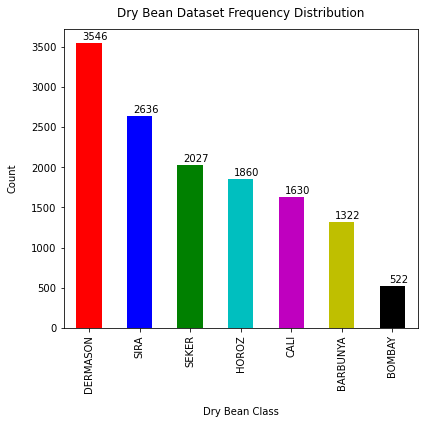

In [12]:
# Ref: https://stackoverflow.com/questions/61062641/pandas-python-legend-not-showing-all-color-categories
# Ref: https://matplotlib.org/stable/gallery/color/named_colors.html
ax = pd.value_counts(df.loc[:, 'Class']).plot.bar(color=['r', 'b', 'g', 'c', 'm', 'y', 'k'], figsize=(6, 6))
# ax.legend(labels=['Seker', 'Barbunya', 'Bombay', 'Cali', 'Dermosan', 'Horoz', 'Sira'], handles=ax.patches, fancybox=True, shadow=True)
# Displays value associated with each category
for p in ax.patches:
    # ax.annotate("{:.1f}".format(p.get_height()), xy=(p.get_x() * 1.015, p.get_height() * 1.015))
    # Ref: https://thepythonguru.com/python-string-formatting/
    # ax.annotate("{:d}".format(p.get_height()), xy=(p.get_x() * 1.015, p.get_height() * 1.015), ha = 'center', va = 'center', xytext = (5, 5), textcoords = 'offset points')
    ax.annotate("{:d}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (6, 6), textcoords = 'offset points')
    
plt.xlabel("Dry Bean Class", labelpad=14)
plt.ylabel("Count", labelpad=14)

plt.title("Dry Bean Dataset Frequency Distribution", y=1.02);

plt.savefig('dry_bean_freq_dist')
plt.tight_layout()
plt.show()

In [13]:
# Ref: https://www.kite.com/python/answers/how-to-find-the-number-of-pandas-dataframe-columns-in-python
# Number of columns
# Alternative
# n = df.shape[1] 
ncols = len(df.columns)
ncols

17

In [14]:
# Ref: https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
nrows = len(df.index)
nrows
# df.shape[0]
# df[df.columns[0]].count()

13543

In [15]:
X = df.iloc[:,0:ncols-1]
Y = df.iloc[:,ncols-1]

In [16]:
# Number of columns
X.shape[1]

16

In [17]:
# Number of rows
X.shape[0]

13543

In [18]:
type(X)

pandas.core.frame.DataFrame

In [19]:
type(Y)

pandas.core.series.Series

In [20]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
ohe = OneHotEncoder(sparse=False)
dummy_y = ohe.fit_transform(encoded_Y.reshape(len(encoded_Y), 1))
# convert integers to dummy variables (i.e. one hot encoded)
# dummy_y = tf.keras.utils.to_categorical(encoded_Y)
print (type(dummy_y))

<class 'numpy.ndarray'>


In [21]:
kf = KFold(n_splits=3, shuffle=False, random_state=None)

for train, test in kf.split(X):
    print("Train data",train,"Test data",test)

Train data [ 4515  4516  4517 ... 13540 13541 13542] Test data [   0    1    2 ... 4512 4513 4514]
Train data [    0     1     2 ... 13540 13541 13542] Test data [4515 4516 4517 ... 9026 9027 9028]
Train data [   0    1    2 ... 9026 9027 9028] Test data [ 9029  9030  9031 ... 13540 13541 13542]


In [22]:
print (len(dummy_y[0]))

7


In [23]:
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,test_size = 0.2)

In [24]:
len(X_train[0])

16

In [25]:
len(y_train[0])

7

## Baseline Model

In [29]:
# Ref: https://xzz201920.medium.com/kernel-regularizer-vs-bias-regularizer-vs-activity-regularizer-a34c5915fc03
# kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
# bias_regularizer: Regularizer to apply a penalty on the layer's bias
# activity_regularizer: Regularizer to apply a penalty on the layer's output
l1_l2_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)
l1_regularizer = regularizers.l1(l1=0.01)
l2_regularizer = regularizers.l2(l2=0.01)
# The default is glorot initializer. It draws samples from a uniform distribution within [-limit, limit] where 
# limit is sqrt(6 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out 
# is the number of output units in the weight tensor.
# initializer_weights = initializers.RandomUniform(minval=0., maxval=1.)
# rate between 0 and 1. Fraction of the input units to drop.
rdnNormal = tf.keras.initializers.RandomNormal(seed=88)
glorotUniform = tf.keras.initializers.GlorotUniform(seed=88)
heUniform = tf.keras.initializers.HeUniform(seed=88)
initializer_weights = [glorotUniform, heUniform, rdnNormal]
dropout = Dropout(rate=0.1)

In [30]:
# Ref: https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
def plot(data, xLabel, yLabel, title, idx1, idx2, location, filename2Save):
    plt.figure(figsize=(10, 6))
    # plt.plot(history.history[idx1])
    # plt.plot(history.history[idx2])
    plt.plot(data[idx1], color='r')
    plt.plot(data[idx2], color='b')
    plt.title(title)
    plt.ylabel(yLabel)
    plt.xlabel(xLabel)
    plt.legend(['Train', 'Test'], loc=location)
    plt.savefig(filename2Save)
    plt.show()

# Hyperparameter Tuning: hidden layers, number of nodes, activation function and batch size

In [31]:
# define baseline model
def baseline_model_hl_num_nodes(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))

    # Note: no activation beyond this point        
    # model.add(Dense(units = 7, kernel_initializer = 'glorot_uniform', activation = 'softmax')) 
    model.add(Dense(units = 7, kernel_initializer = glorotUniform, activation = 'softmax')) 
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=baseline_model_hl_num_nodes, verbose=1)

layers = [[10], [12, 8], [11, 9], [14, 10, 9]]
activations = ['relu', 'selu', 'elu']

param_grid = dict(layers=layers, activation=activations, batch_size = [64, 128, 256], epochs=[100])
grid = GridSearchCV(estimator=model, param_grid=param_grid)


grid_result = grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

Epoch 1/100
136/136 [==============================] - 9s 3ms/step - loss: 1.6307 - accuracy: 0.3991
Epoch 2/100
136/136 [==============================] - 0s 2ms/step - loss: 0.9704 - accuracy: 0.6732
Epoch 3/100
136/136 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.7769
Epoch 4/100
136/136 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.8594
Epoch 5/100
136/136 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8836
Epoch 6/100
136/136 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8960
Epoch 7/100
136/136 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.9013
Epoch 8/100
136/136 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.9037
Epoch 9/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.9082
Epoch 10/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2687 - accura

136/136 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9308
Epoch 61/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9305
Epoch 62/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9303
Epoch 63/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9310
Epoch 64/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.9318
Epoch 65/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.9317
Epoch 66/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9319
Epoch 67/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.9309
Epoch 68/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9308
Epoch 69/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9213
Epoch 19/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.9225
Epoch 20/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9229
Epoch 21/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9223
Epoch 22/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2188 - accuracy: 0.9227
Epoch 23/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9223
Epoch 24/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9232
Epoch 25/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9233
Epoch 26/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9229
Epoch 27/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9277
Epoch 78/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9280
Epoch 79/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9271
Epoch 80/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9274
Epoch 81/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9273
Epoch 82/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9272
Epoch 83/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9273
Epoch 84/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1916 - accuracy: 0.9267
Epoch 85/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9278
Epoch 86/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9298
Epoch 36/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9307
Epoch 37/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9296
Epoch 38/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9287
Epoch 39/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9296
Epoch 40/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9298
Epoch 41/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9294
Epoch 42/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9309
Epoch 43/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9303
Epoch 44/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9312
Epoch 95/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9301
Epoch 96/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.9308
Epoch 97/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9300
Epoch 98/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9309
Epoch 99/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9307
Epoch 100/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9303
Epoch 1/100
136/136 [==============================] - 1s 2ms/step - loss: 1.5486 - accuracy: 0.4515
Epoch 2/100
136/136 [==============================] - 0s 2ms/step - loss: 1.0203 - accuracy: 0.6131
Epoch 3/100
136/136 [==============================] - 0s 2ms/step - loss: 0.7633 - accuracy: 0.71

136/136 [==============================] - 0s 3ms/step - loss: 0.1918 - accuracy: 0.9280
Epoch 53/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1925 - accuracy: 0.9287
Epoch 54/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1919 - accuracy: 0.9285
Epoch 55/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1919 - accuracy: 0.9280
Epoch 56/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1910 - accuracy: 0.9300
Epoch 57/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1915 - accuracy: 0.9278
Epoch 58/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1915 - accuracy: 0.9294
Epoch 59/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 0.9296
Epoch 60/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1898 - accuracy: 0.9290
Epoch 61/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.9215
Epoch 11/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2223 - accuracy: 0.9234
Epoch 12/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2177 - accuracy: 0.9241
Epoch 13/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9249
Epoch 14/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9252
Epoch 15/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9263
Epoch 16/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9270
Epoch 17/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9275
Epoch 18/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9279
Epoch 19/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9298
Epoch 70/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9298
Epoch 71/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9288
Epoch 72/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9295
Epoch 73/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9296
Epoch 74/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.9295
Epoch 75/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9294
Epoch 76/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9303
Epoch 77/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9298
Epoch 78/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9249
Epoch 28/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9241
Epoch 29/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9256
Epoch 30/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9242
Epoch 31/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9255
Epoch 32/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9262
Epoch 33/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9260
Epoch 34/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9254
Epoch 35/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9263
Epoch 36/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 0.9302
Epoch 87/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1838 - accuracy: 0.9307
Epoch 88/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1845 - accuracy: 0.9300
Epoch 89/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1840 - accuracy: 0.9309
Epoch 90/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1838 - accuracy: 0.9296
Epoch 91/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1834 - accuracy: 0.9304
Epoch 92/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.9307
Epoch 93/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1834 - accuracy: 0.9312
Epoch 94/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.9308
Epoch 95/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.1897 - accuracy: 0.9311
Epoch 45/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9313
Epoch 46/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1894 - accuracy: 0.9297
Epoch 47/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9316
Epoch 48/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1877 - accuracy: 0.9303
Epoch 49/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1874 - accuracy: 0.9297
Epoch 50/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1877 - accuracy: 0.9312
Epoch 51/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1872 - accuracy: 0.9298
Epoch 52/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1867 - accuracy: 0.9320
Epoch 53/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1866 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.9079 - accuracy: 0.6547
Epoch 3/100
136/136 [==============================] - 0s 3ms/step - loss: 0.5740 - accuracy: 0.7772
Epoch 4/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3560 - accuracy: 0.8922
Epoch 5/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2708 - accuracy: 0.9087
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2402 - accuracy: 0.9160
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2281 - accuracy: 0.9190
Epoch 8/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 0.9232
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2136 - accuracy: 0.9237
Epoch 10/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9236
Epoch 11/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9244


68/68 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9232
Epoch 63/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9237
Epoch 64/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9228
Epoch 65/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9230
Epoch 66/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9234
Epoch 67/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9240
Epoch 68/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9240
Epoch 69/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9244
Epoch 70/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9245
Epoch 71/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9227
Epoch 72/100


68/68 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.9204
Epoch 25/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9206
Epoch 26/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9205
Epoch 27/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9220
Epoch 28/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9212
Epoch 29/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9215
Epoch 30/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.9220
Epoch 31/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9218
Epoch 32/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9219
Epoch 33/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9230
Epoch 34/100


68/68 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9288
Epoch 88/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9290
Epoch 89/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9290
Epoch 90/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9292
Epoch 91/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9286
Epoch 92/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9290
Epoch 93/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9287
Epoch 94/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9283
Epoch 95/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9295
Epoch 96/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9280
Epoch 97/100


68/68 [==============================] - 0s 3ms/step - loss: 0.2006 - accuracy: 0.9240
Epoch 50/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9235
Epoch 51/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9233
Epoch 52/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2004 - accuracy: 0.9232
Epoch 53/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.9243
Epoch 54/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9240
Epoch 55/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9235
Epoch 56/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9247
Epoch 57/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9244
Epoch 58/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1987 - accuracy: 0.9250
Epoch 59/100


68/68 [==============================] - 0s 3ms/step - loss: 0.2683 - accuracy: 0.9075
Epoch 11/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.9086
Epoch 12/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.9123
Epoch 13/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2458 - accuracy: 0.9136
Epoch 14/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2410 - accuracy: 0.9144
Epoch 15/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2373 - accuracy: 0.9162
Epoch 16/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9150
Epoch 17/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2319 - accuracy: 0.9159
Epoch 18/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2287 - accuracy: 0.9165
Epoch 19/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.9169
Epoch 20/100


68/68 [==============================] - 0s 3ms/step - loss: 0.1958 - accuracy: 0.9283
Epoch 93/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1966 - accuracy: 0.9288
Epoch 94/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9279
Epoch 95/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9277
Epoch 96/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9287
Epoch 97/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9281
Epoch 98/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9279
Epoch 99/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9271
Epoch 100/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9257
Epoch 1/100
68/68 [==============================] - 0s 2ms/step - loss: 1.9025 - accuracy: 0.2096
Epoch 2/100
6

68/68 [==============================] - 0s 3ms/step - loss: 0.1975 - accuracy: 0.9286
Epoch 55/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.9294
Epoch 56/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1966 - accuracy: 0.9286
Epoch 57/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9284
Epoch 58/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1969 - accuracy: 0.9287
Epoch 59/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9292
Epoch 60/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9289
Epoch 61/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9287
Epoch 62/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9290
Epoch 63/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1950 - accuracy: 0.9293
Epoch 64/100


68/68 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9221
Epoch 16/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.9227
Epoch 17/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.9236
Epoch 18/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9257
Epoch 19/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9251
Epoch 20/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9243
Epoch 21/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2083 - accuracy: 0.9268
Epoch 22/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9265
Epoch 23/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9263
Epoch 24/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9260
Epoch 25/100


68/68 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9286
Epoch 77/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.9286
Epoch 78/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9280
Epoch 79/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1945 - accuracy: 0.9296
Epoch 80/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1951 - accuracy: 0.9288
Epoch 81/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9289
Epoch 82/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1941 - accuracy: 0.9290
Epoch 83/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9279
Epoch 84/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9270
Epoch 85/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9292
Epoch 86/100


68/68 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9273
Epoch 37/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9278
Epoch 38/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1975 - accuracy: 0.9274
Epoch 39/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1971 - accuracy: 0.9273
Epoch 40/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9271
Epoch 41/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9286
Epoch 42/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9280
Epoch 43/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.9275
Epoch 44/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.9274
Epoch 45/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9277
Epoch 46/100


68/68 [==============================] - 0s 3ms/step - loss: 0.1843 - accuracy: 0.9294
Epoch 98/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1839 - accuracy: 0.9304
Epoch 99/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1836 - accuracy: 0.9310
Epoch 100/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9382
Epoch 1/100
68/68 [==============================] - 0s 3ms/step - loss: 1.6263 - accuracy: 0.4364
Epoch 2/100
68/68 [==============================] - 0s 3ms/step - loss: 1.1324 - accuracy: 0.5457
Epoch 3/100
68/68 [==============================] - 0s 3ms/step - loss: 0.8624 - accuracy: 0.6278
Epoch 4/100
68/68 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.7456
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.8490
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.9016
Epoch 7/100
68/68 

68/68 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9252
Epoch 60/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9275
Epoch 61/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1963 - accuracy: 0.9280
Epoch 62/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1966 - accuracy: 0.9260
Epoch 63/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9260
Epoch 64/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9270
Epoch 65/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9273
Epoch 66/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.9263
Epoch 67/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9280
Epoch 68/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.9256
Epoch 69/100


68/68 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9243
Epoch 21/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2043 - accuracy: 0.9259
Epoch 22/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9250
Epoch 23/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2037 - accuracy: 0.9267
Epoch 24/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9257
Epoch 25/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.9255
Epoch 26/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9263
Epoch 27/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1989 - accuracy: 0.9264
Epoch 28/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1996 - accuracy: 0.9260
Epoch 29/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.9273
Epoch 30/100


34/34 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9227
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9222
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9217
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9226
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9218
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9236
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9230
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9227
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9228
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9226
Epoch 92/100


34/34 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9203
Epoch 45/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9202
Epoch 46/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9211
Epoch 47/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9210
Epoch 48/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9214
Epoch 49/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9218
Epoch 50/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9220
Epoch 51/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.9228
Epoch 52/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9220
Epoch 53/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9225
Epoch 54/100


34/34 [==============================] - 0s 2ms/step - loss: 1.0296 - accuracy: 0.6919
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9224 - accuracy: 0.7169
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8361 - accuracy: 0.7383
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7637 - accuracy: 0.7539
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.7779
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7952
Epoch 12/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.8141
Epoch 13/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.8288
Epoch 14/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.8418
Epoch 15/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.8493
Epoch 16/100
34/

34/34 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9262
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9262
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9262
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9266
Epoch 92/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9260
Epoch 93/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9258
Epoch 94/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9260
Epoch 95/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9256
Epoch 96/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9266
Epoch 97/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9260
Epoch 98/100


34/34 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9248
Epoch 51/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9257
Epoch 52/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9255
Epoch 53/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9264
Epoch 54/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9253
Epoch 55/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9250
Epoch 56/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2037 - accuracy: 0.9270
Epoch 57/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9253
Epoch 58/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9268
Epoch 59/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9264
Epoch 60/100


34/34 [==============================] - 0s 3ms/step - loss: 0.3575 - accuracy: 0.9012
Epoch 13/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3318 - accuracy: 0.9043
Epoch 14/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 0.9071
Epoch 15/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2954 - accuracy: 0.9099
Epoch 16/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.9110
Epoch 17/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2735 - accuracy: 0.9108
Epoch 18/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.9140
Epoch 19/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2596 - accuracy: 0.9157
Epoch 20/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2543 - accuracy: 0.9162
Epoch 21/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.9172
Epoch 22/100


34/34 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9272
Epoch 95/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9279
Epoch 96/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.9264
Epoch 97/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9277
Epoch 98/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9273
Epoch 99/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.9280
Epoch 100/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9257
Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 1.9261 - accuracy: 0.1477
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 1.6976 - accuracy: 0.3879
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 1.5125 - accuracy: 0.4665
Epoch 4/100
34/34

34/34 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.9225
Epoch 56/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 0.9226
Epoch 57/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2367 - accuracy: 0.9230
Epoch 58/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9234
Epoch 59/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.9233
Epoch 60/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.9247
Epoch 61/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.9236
Epoch 62/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.9247
Epoch 63/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2304 - accuracy: 0.9230
Epoch 64/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2297 - accuracy: 0.9244
Epoch 65/100


34/34 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.9070
Epoch 18/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3040 - accuracy: 0.9100
Epoch 19/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2890 - accuracy: 0.9110
Epoch 20/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2774 - accuracy: 0.9123
Epoch 21/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.9139
Epoch 22/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2596 - accuracy: 0.9146
Epoch 23/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2537 - accuracy: 0.9148
Epoch 24/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2482 - accuracy: 0.9160
Epoch 25/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.9184
Epoch 26/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.9192
Epoch 27/100


34/34 [==============================] - 0s 3ms/step - loss: 0.1982 - accuracy: 0.9266
Epoch 100/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9271
Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 2.0419 - accuracy: 0.1738
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 1.8256 - accuracy: 0.3114
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 1.6723 - accuracy: 0.4451
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4908 - accuracy: 0.5170
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 1.2890 - accuracy: 0.5524
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 1.0866 - accuracy: 0.6098
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9174 - accuracy: 0.6694
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7876 - accuracy: 0.7426
Epoch 9/100
34/34 [===

34/34 [==============================] - 0s 3ms/step - loss: 0.2015 - accuracy: 0.9286
Epoch 62/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.9282
Epoch 63/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.9275
Epoch 64/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.9275
Epoch 65/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.9300
Epoch 66/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1989 - accuracy: 0.9282
Epoch 67/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1987 - accuracy: 0.9287
Epoch 68/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9280
Epoch 69/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.9287
Epoch 70/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.9281
Epoch 71/100


34/34 [==============================] - 0s 3ms/step - loss: 0.2267 - accuracy: 0.9188
Epoch 24/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.9205
Epoch 25/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2210 - accuracy: 0.9229
Epoch 26/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2196 - accuracy: 0.9226
Epoch 27/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9236
Epoch 28/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.9235
Epoch 29/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9250
Epoch 30/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9248
Epoch 31/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2123 - accuracy: 0.9258
Epoch 32/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2119 - accuracy: 0.9260
Epoch 33/100


34/34 [==============================] - 0s 3ms/step - loss: 0.1956 - accuracy: 0.9294
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.9309
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1951 - accuracy: 0.9305
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9310
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1940 - accuracy: 0.9303
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9303
Epoch 92/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9305
Epoch 93/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9315
Epoch 94/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1940 - accuracy: 0.9317
Epoch 95/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.9285
Epoch 96/100


34/34 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9281
Epoch 49/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1969 - accuracy: 0.9257
Epoch 50/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9275
Epoch 51/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9264
Epoch 52/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9280
Epoch 53/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9279
Epoch 54/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9273
Epoch 55/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9278
Epoch 56/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1937 - accuracy: 0.9278
Epoch 57/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1937 - accuracy: 0.9272
Epoch 58/100


136/136 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9187
Epoch 8/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.9176
Epoch 9/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.9208
Epoch 10/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.9218
Epoch 11/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9220
Epoch 12/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9225
Epoch 13/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.9235
Epoch 14/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9234
Epoch 15/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9247
Epoch 16/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.

136/136 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9286
Epoch 67/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9287
Epoch 68/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9282
Epoch 69/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9285
Epoch 70/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9286
Epoch 71/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9283
Epoch 72/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9281
Epoch 73/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9282
Epoch 74/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9278
Epoch 75/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9231
Epoch 25/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9244
Epoch 26/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9239
Epoch 27/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9249
Epoch 28/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9248
Epoch 29/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9258
Epoch 30/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9241
Epoch 31/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9252
Epoch 32/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9254
Epoch 33/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.1900 - accuracy: 0.9279
Epoch 84/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1904 - accuracy: 0.9272
Epoch 85/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1898 - accuracy: 0.9286
Epoch 86/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1901 - accuracy: 0.9283
Epoch 87/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1899 - accuracy: 0.9289
Epoch 88/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1899 - accuracy: 0.9283
Epoch 89/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1901 - accuracy: 0.9289
Epoch 90/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1896 - accuracy: 0.9282
Epoch 91/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9277
Epoch 92/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1889 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9277
Epoch 42/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9292
Epoch 43/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9283
Epoch 44/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9289
Epoch 45/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9286
Epoch 46/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9282
Epoch 47/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9296
Epoch 48/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1927 - accuracy: 0.9281
Epoch 49/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1921 - accuracy: 0.9290
Epoch 50/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 

34/34 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9289
Epoch 1/100
136/136 [==============================] - 1s 3ms/step - loss: 1.4851 - accuracy: 0.5077
Epoch 2/100
136/136 [==============================] - 0s 3ms/step - loss: 0.7372 - accuracy: 0.8080
Epoch 3/100
136/136 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.8741
Epoch 4/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8962
Epoch 5/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2919 - accuracy: 0.9071
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2587 - accuracy: 0.9135
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.9182
Epoch 8/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.9216
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2222 - accuracy: 0.9197
Epoc

136/136 [==============================] - 0s 3ms/step - loss: 0.1927 - accuracy: 0.9265
Epoch 59/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1929 - accuracy: 0.9265
Epoch 60/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9258
Epoch 61/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1927 - accuracy: 0.9264
Epoch 62/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9271
Epoch 63/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1917 - accuracy: 0.9270
Epoch 64/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1922 - accuracy: 0.9275
Epoch 65/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1916 - accuracy: 0.9273
Epoch 66/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.9285
Epoch 67/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9219
Epoch 17/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9235
Epoch 18/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9249
Epoch 19/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9242
Epoch 20/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9250
Epoch 21/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9240
Epoch 22/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9238
Epoch 23/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9245
Epoch 24/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9236
Epoch 25/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9310
Epoch 76/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.9297
Epoch 77/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.9300
Epoch 78/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9304
Epoch 79/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9294
Epoch 80/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9302
Epoch 81/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9309
Epoch 82/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9304
Epoch 83/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9304
Epoch 84/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.1968 - accuracy: 0.9223
Epoch 34/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9263
Epoch 35/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1960 - accuracy: 0.9272
Epoch 36/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1946 - accuracy: 0.9257
Epoch 37/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.9250
Epoch 38/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9259
Epoch 39/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9258
Epoch 40/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1934 - accuracy: 0.9263
Epoch 41/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1929 - accuracy: 0.9283
Epoch 42/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1936 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.9339
Epoch 93/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1784 - accuracy: 0.9340
Epoch 94/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1791 - accuracy: 0.9343
Epoch 95/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1780 - accuracy: 0.9332
Epoch 96/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1772 - accuracy: 0.9342
Epoch 97/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1784 - accuracy: 0.9355
Epoch 98/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1780 - accuracy: 0.9345
Epoch 99/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1779 - accuracy: 0.9337
Epoch 100/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9239
Epoch 1/100
136/136 [==============================] - 1s 3ms/step - loss: 1.2921 - accuracy: 0.

136/136 [==============================] - 0s 3ms/step - loss: 0.1866 - accuracy: 0.9298
Epoch 51/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9303
Epoch 52/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9316
Epoch 53/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1854 - accuracy: 0.9296
Epoch 54/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1852 - accuracy: 0.9304
Epoch 55/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1848 - accuracy: 0.9317
Epoch 56/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1852 - accuracy: 0.9308
Epoch 57/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1854 - accuracy: 0.9298
Epoch 58/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1845 - accuracy: 0.9317
Epoch 59/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1844 - accuracy: 

68/68 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8995
Epoch 9/100
68/68 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.9065
Epoch 10/100
68/68 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.9103
Epoch 11/100
68/68 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.9123
Epoch 12/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.9147
Epoch 13/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2776 - accuracy: 0.9155
Epoch 14/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.9154
Epoch 15/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9168
Epoch 16/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.9167
Epoch 17/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.9181
Epoch 18/100
6

68/68 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9235
Epoch 91/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9237
Epoch 92/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9233
Epoch 93/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9233
Epoch 94/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9235
Epoch 95/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9235
Epoch 96/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9226
Epoch 97/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9233
Epoch 98/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9233
Epoch 99/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9244
Epoch 100/100

68/68 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9252
Epoch 53/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9248
Epoch 54/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9242
Epoch 55/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9241
Epoch 56/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9252
Epoch 57/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9242
Epoch 58/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9253
Epoch 59/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9250
Epoch 60/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9253
Epoch 61/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9251
Epoch 62/100


68/68 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.9234
Epoch 15/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.9232
Epoch 16/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9236
Epoch 17/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9237
Epoch 18/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9243
Epoch 19/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.9248
Epoch 20/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9242
Epoch 21/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9246
Epoch 22/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9241
Epoch 23/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9237
Epoch 24/100


68/68 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9281
Epoch 97/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9260
Epoch 98/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9282
Epoch 99/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9274
Epoch 100/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9238
Epoch 1/100
68/68 [==============================] - 0s 3ms/step - loss: 1.9616 - accuracy: 0.2155
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 1.1258 - accuracy: 0.6168
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 0.7817 - accuracy: 0.7623
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.8394
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.8765
Epoch 6/100
68/68

68/68 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9283
Epoch 58/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9288
Epoch 59/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1950 - accuracy: 0.9286
Epoch 60/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9281
Epoch 61/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1945 - accuracy: 0.9275
Epoch 62/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9293
Epoch 63/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1945 - accuracy: 0.9294
Epoch 64/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9286
Epoch 65/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1941 - accuracy: 0.9285
Epoch 66/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9296
Epoch 67/100


68/68 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9234
Epoch 20/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2288 - accuracy: 0.9226
Epoch 21/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9242
Epoch 22/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.9228
Epoch 23/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9237
Epoch 24/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9234
Epoch 25/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.9251
Epoch 26/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9238
Epoch 27/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9235
Epoch 28/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9257
Epoch 29/100


68/68 [==============================] - 0s 3ms/step - loss: 0.1861 - accuracy: 0.9310
Epoch 81/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.9316
Epoch 82/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1865 - accuracy: 0.9299
Epoch 83/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 0.9315
Epoch 84/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1860 - accuracy: 0.9305
Epoch 85/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1856 - accuracy: 0.9307
Epoch 86/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9303
Epoch 87/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1854 - accuracy: 0.9311
Epoch 88/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1856 - accuracy: 0.9315
Epoch 89/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1863 - accuracy: 0.9320
Epoch 90/100


68/68 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9297
Epoch 42/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9298
Epoch 43/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1958 - accuracy: 0.9293
Epoch 44/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9304
Epoch 45/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9294
Epoch 46/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9300
Epoch 47/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9293
Epoch 48/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9309
Epoch 49/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9298
Epoch 50/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9285
Epoch 51/100


68/68 [==============================] - 0s 3ms/step - loss: 1.8903 - accuracy: 0.3939
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 1.1081 - accuracy: 0.6308
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 0.7234 - accuracy: 0.8130
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.8744
Epoch 5/100
68/68 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8919
Epoch 6/100
68/68 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.9018
Epoch 7/100
68/68 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.9067
Epoch 8/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.9098
Epoch 9/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.9103
Epoch 10/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9142
Epoch 11/100
68/68 [=

68/68 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9297
Epoch 64/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9282
Epoch 65/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9301
Epoch 66/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.9286
Epoch 67/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9297
Epoch 68/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9301
Epoch 69/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.9305
Epoch 70/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9290
Epoch 71/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.9307
Epoch 72/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.9309
Epoch 73/100


68/68 [==============================] - 0s 3ms/step - loss: 0.1992 - accuracy: 0.9296
Epoch 24/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1986 - accuracy: 0.9288
Epoch 25/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1977 - accuracy: 0.9301
Epoch 26/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1977 - accuracy: 0.9292
Epoch 27/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9308
Epoch 28/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.9298
Epoch 29/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.9302
Epoch 30/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1951 - accuracy: 0.9302
Epoch 31/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9286
Epoch 32/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1954 - accuracy: 0.9295
Epoch 33/100


68/68 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.9315
Epoch 87/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1862 - accuracy: 0.9304
Epoch 88/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.9307
Epoch 89/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1854 - accuracy: 0.9309
Epoch 90/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1842 - accuracy: 0.9313
Epoch 91/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1848 - accuracy: 0.9317
Epoch 92/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1844 - accuracy: 0.9319
Epoch 93/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9317
Epoch 94/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.9326
Epoch 95/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1844 - accuracy: 0.9320
Epoch 96/100


68/68 [==============================] - 0s 3ms/step - loss: 0.1886 - accuracy: 0.9318
Epoch 48/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1873 - accuracy: 0.9303
Epoch 49/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1892 - accuracy: 0.9303
Epoch 50/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1876 - accuracy: 0.9308
Epoch 51/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1875 - accuracy: 0.9316
Epoch 52/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1873 - accuracy: 0.9293
Epoch 53/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1871 - accuracy: 0.9324
Epoch 54/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 0.9310
Epoch 55/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.9318
Epoch 56/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9322
Epoch 57/100


34/34 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.8681
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5182 - accuracy: 0.8799
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8889
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8936
Epoch 12/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8987
Epoch 13/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.9024
Epoch 14/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.9057
Epoch 15/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.9094
Epoch 16/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.9115
Epoch 17/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.9148
Epoch 18/100
3

34/34 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9277
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9264
Epoch 92/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9281
Epoch 93/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9280
Epoch 94/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9275
Epoch 95/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9274
Epoch 96/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9272
Epoch 97/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9278
Epoch 98/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9275
Epoch 99/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9279
Epoch 100/100

34/34 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9217
Epoch 52/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9222
Epoch 53/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.9219
Epoch 54/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9228
Epoch 55/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.9226
Epoch 56/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9228
Epoch 57/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9229
Epoch 58/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9226
Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9228
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9232
Epoch 61/100


34/34 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.9007
Epoch 14/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.9031
Epoch 15/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.9040
Epoch 16/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2953 - accuracy: 0.9078
Epoch 17/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.9094
Epoch 18/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2771 - accuracy: 0.9092
Epoch 19/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2705 - accuracy: 0.9113
Epoch 20/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.9124
Epoch 21/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2600 - accuracy: 0.9122
Epoch 22/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.9137
Epoch 23/100


34/34 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.9255
Epoch 96/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9264
Epoch 97/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9251
Epoch 98/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.9260
Epoch 99/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9256
Epoch 100/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9359
Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 2.1341 - accuracy: 0.2068
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 1.6043 - accuracy: 0.4206
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 1.2218 - accuracy: 0.5522
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9789 - accuracy: 0.6173
Epoch 5/100
34/34 

34/34 [==============================] - 0s 3ms/step - loss: 0.2056 - accuracy: 0.9270
Epoch 57/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9273
Epoch 58/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9274
Epoch 59/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9283
Epoch 60/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2042 - accuracy: 0.9277
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9286
Epoch 62/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9280
Epoch 63/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9279
Epoch 64/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9290
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9286
Epoch 66/100


34/34 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.9094
Epoch 19/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2889 - accuracy: 0.9128
Epoch 20/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.9143
Epoch 21/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2714 - accuracy: 0.9147
Epoch 22/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2640 - accuracy: 0.9162
Epoch 23/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.9167
Epoch 24/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.9175
Epoch 25/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.9197
Epoch 26/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2424 - accuracy: 0.9190
Epoch 27/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9196
Epoch 28/100


9/9 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9252
Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 2.1453 - accuracy: 0.2285
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 1.6205 - accuracy: 0.4586
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.2833 - accuracy: 0.5517
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0385 - accuracy: 0.6505
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8511 - accuracy: 0.7456
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.8065
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.8405
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.8671
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8838
Epoch 10/100
34/34 [====

34/34 [==============================] - 0s 3ms/step - loss: 0.1996 - accuracy: 0.9283
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9278
Epoch 62/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1986 - accuracy: 0.9278
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9283
Epoch 64/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9279
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9286
Epoch 66/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1971 - accuracy: 0.9281
Epoch 67/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9283
Epoch 68/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9282
Epoch 69/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1965 - accuracy: 0.9287
Epoch 70/100


34/34 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.9198
Epoch 23/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.9185
Epoch 24/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.9188
Epoch 25/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9213
Epoch 26/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9199
Epoch 27/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9215
Epoch 28/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9210
Epoch 29/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2285 - accuracy: 0.9217
Epoch 30/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9207
Epoch 31/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9228
Epoch 32/100


34/34 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9287
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.9289
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1945 - accuracy: 0.9290
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9297
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1940 - accuracy: 0.9299
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.9301
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9295
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 0.9288
Epoch 92/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9294
Epoch 93/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 0.9288
Epoch 94/100


34/34 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.9295
Epoch 47/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9289
Epoch 48/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9288
Epoch 49/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.9281
Epoch 50/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1985 - accuracy: 0.9292
Epoch 51/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1985 - accuracy: 0.9278
Epoch 52/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1982 - accuracy: 0.9297
Epoch 53/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.9296
Epoch 54/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1973 - accuracy: 0.9293
Epoch 55/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9288
Epoch 56/100


34/34 [==============================] - 0s 3ms/step - loss: 0.3190 - accuracy: 0.9113
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.9133
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2805 - accuracy: 0.9157
Epoch 11/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2677 - accuracy: 0.9168
Epoch 12/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2579 - accuracy: 0.9184
Epoch 13/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.9182
Epoch 14/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 0.9188
Epoch 15/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.9211
Epoch 16/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.9208
Epoch 17/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.9222
Epoch 18/100
3

34/34 [==============================] - 0s 3ms/step - loss: 0.1925 - accuracy: 0.9296
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1931 - accuracy: 0.9297
Epoch 92/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1924 - accuracy: 0.9283
Epoch 93/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9294
Epoch 94/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1922 - accuracy: 0.9297
Epoch 95/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9285
Epoch 96/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 0.9290
Epoch 97/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9287
Epoch 98/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9296
Epoch 99/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1922 - accuracy: 0.9282
Epoch 100/100

136/136 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9243
Epoch 52/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9232
Epoch 53/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9235
Epoch 54/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9240
Epoch 55/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9228
Epoch 56/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9241
Epoch 57/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9245
Epoch 58/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9242
Epoch 59/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9247
Epoch 60/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.9144
Epoch 10/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.9170
Epoch 11/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9190
Epoch 12/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.9189
Epoch 13/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9203
Epoch 14/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.9211
Epoch 15/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9215
Epoch 16/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9212
Epoch 17/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9227
Epoch 18/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9289
Epoch 69/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9278
Epoch 70/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9293
Epoch 71/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9285
Epoch 72/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9285
Epoch 73/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9292
Epoch 74/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9282
Epoch 75/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9292
Epoch 76/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9285
Epoch 77/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.1992 - accuracy: 0.9257
Epoch 27/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9262
Epoch 28/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9250
Epoch 29/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1981 - accuracy: 0.9250
Epoch 30/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9267
Epoch 31/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9259
Epoch 32/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9257
Epoch 33/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1971 - accuracy: 0.9241
Epoch 34/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9263
Epoch 35/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9324
Epoch 86/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.9324
Epoch 87/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1845 - accuracy: 0.9315
Epoch 88/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.9327
Epoch 89/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.9320
Epoch 90/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1837 - accuracy: 0.9331
Epoch 91/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9341
Epoch 92/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1838 - accuracy: 0.9327
Epoch 93/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9325
Epoch 94/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9283
Epoch 44/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9283
Epoch 45/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9294: 0s - loss: 0.2007 - accura
Epoch 46/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9286
Epoch 47/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9290
Epoch 48/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9289
Epoch 49/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9286
Epoch 50/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9292
Epoch 51/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9289
Epoch 52/100
136/136 [==============================] - 0s 3ms/step

Epoch 22/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9256
Epoch 23/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9260
Epoch 24/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1983 - accuracy: 0.9262
Epoch 25/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9270
Epoch 26/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9270
Epoch 27/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9274
Epoch 28/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9286
Epoch 29/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.9287
Epoch 30/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9281
Epoch 31/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1918

136/136 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9272
Epoch 82/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9255
Epoch 83/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9266
Epoch 84/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9265
Epoch 85/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1912 - accuracy: 0.9267
Epoch 86/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1916 - accuracy: 0.9280
Epoch 87/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 0.9280
Epoch 88/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9263
Epoch 89/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9273
Epoch 90/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.1982 - accuracy: 0.9266
Epoch 40/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1982 - accuracy: 0.9256
Epoch 41/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9257
Epoch 42/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1982 - accuracy: 0.9243
Epoch 43/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9249
Epoch 44/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9278
Epoch 45/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9266
Epoch 46/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1966 - accuracy: 0.9266
Epoch 47/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9271
Epoch 48/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 

136/136 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9298
Epoch 99/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.9298
Epoch 100/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9289
Epoch 1/100
136/136 [==============================] - 1s 2ms/step - loss: 1.5084 - accuracy: 0.5000
Epoch 2/100
136/136 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.8053
Epoch 3/100
136/136 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8909
Epoch 4/100
136/136 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.9018
Epoch 5/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.9067
Epoch 6/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.9123
Epoch 7/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9157
E

136/136 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9268
Epoch 57/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1870 - accuracy: 0.9280
Epoch 58/100
136/136 [==============================] - 1s 5ms/step - loss: 0.1874 - accuracy: 0.9301
Epoch 59/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9285
Epoch 60/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9281: 0s - loss: 0.1823 - accuracy
Epoch 61/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9300
Epoch 62/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1866 - accuracy: 0.9296
Epoch 63/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9289
Epoch 64/100
136/136 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9302
Epoch 65/100
136/136 [==============================] - 0s 2ms/st

136/136 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9236
Epoch 15/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9238
Epoch 16/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2038 - accuracy: 0.9230
Epoch 17/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2049 - accuracy: 0.9244
Epoch 18/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9244
Epoch 19/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9240
Epoch 20/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9251
Epoch 21/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.9259
Epoch 22/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.9264
Epoch 23/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.1841 - accuracy: 0.9318
Epoch 74/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1834 - accuracy: 0.9324
Epoch 75/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.9308
Epoch 76/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1838 - accuracy: 0.9324
Epoch 77/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1837 - accuracy: 0.9319
Epoch 78/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1838 - accuracy: 0.9337
Epoch 79/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1835 - accuracy: 0.9322
Epoch 80/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1831 - accuracy: 0.9333
Epoch 81/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1844 - accuracy: 0.9325
Epoch 82/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1835 - accuracy: 

68/68 [==============================] - 0s 3ms/step - loss: 0.2157 - accuracy: 0.9220
Epoch 33/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9211
Epoch 34/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2143 - accuracy: 0.9227
Epoch 35/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2140 - accuracy: 0.9206
Epoch 36/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9214
Epoch 37/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9220
Epoch 38/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9220
Epoch 39/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9220
Epoch 40/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2119 - accuracy: 0.9221
Epoch 41/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2114 - accuracy: 0.9215
Epoch 42/100


68/68 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9280
Epoch 95/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9285
Epoch 96/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9285
Epoch 97/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9290
Epoch 98/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9293
Epoch 99/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9286
Epoch 100/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9132
Epoch 1/100
68/68 [==============================] - 0s 2ms/step - loss: 1.9578 - accuracy: 0.2214
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 1.3411 - accuracy: 0.5890
Epoch 3/100
68/68 [==============================] - 0s 3ms/step - loss: 0.9999 - accuracy: 0.7365
Epoch 4/100
68/

68/68 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9257
Epoch 57/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9250
Epoch 58/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9257
Epoch 59/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9252
Epoch 60/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9251
Epoch 61/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9257
Epoch 62/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9249
Epoch 63/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9255
Epoch 64/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9249
Epoch 65/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9257
Epoch 66/100


68/68 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9206
Epoch 18/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.9213
Epoch 19/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9221
Epoch 20/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9215
Epoch 21/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9211
Epoch 22/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9217
Epoch 23/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.9227
Epoch 24/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 0.9220
Epoch 25/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2119 - accuracy: 0.9233
Epoch 26/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9226
Epoch 27/100


68/68 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 0.9262
Epoch 100/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9359
Epoch 1/100
68/68 [==============================] - 0s 3ms/step - loss: 1.7012 - accuracy: 0.3893
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 1.1601 - accuracy: 0.5943
Epoch 3/100
68/68 [==============================] - 0s 3ms/step - loss: 0.8458 - accuracy: 0.6869
Epoch 4/100
68/68 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.8097
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 0.5146 - accuracy: 0.8778
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.9007
Epoch 7/100
68/68 [==============================] - 0s 3ms/step - loss: 0.3521 - accuracy: 0.9116
Epoch 8/100
68/68 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.9160
Epoch 9/100
68/68 [=

68/68 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9274
Epoch 61/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9287
Epoch 62/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1989 - accuracy: 0.9280
Epoch 63/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1989 - accuracy: 0.9282
Epoch 64/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9278
Epoch 65/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9264
Epoch 66/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9281
Epoch 67/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9289
Epoch 68/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9280
Epoch 69/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9278
Epoch 70/100


68/68 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9246
Epoch 21/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9252
Epoch 22/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9247
Epoch 23/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9240
Epoch 24/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9256
Epoch 25/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9251
Epoch 26/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9257
Epoch 27/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9260
Epoch 28/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9259
Epoch 29/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9260
Epoch 30/100


68/68 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9257
Epoch 83/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1963 - accuracy: 0.9266
Epoch 84/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1960 - accuracy: 0.9257
Epoch 85/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.9272
Epoch 86/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9259
Epoch 87/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1954 - accuracy: 0.9266
Epoch 88/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9256
Epoch 89/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1954 - accuracy: 0.9268
Epoch 90/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1954 - accuracy: 0.9260
Epoch 91/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1960 - accuracy: 0.9255
Epoch 92/100


68/68 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.9265
Epoch 45/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9264
Epoch 46/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9263
Epoch 47/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.9259
Epoch 48/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.9260
Epoch 49/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9259
Epoch 50/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9267
Epoch 51/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9268
Epoch 52/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9267
Epoch 53/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9270
Epoch 54/100


68/68 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8827
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8994
Epoch 7/100
68/68 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.9061
Epoch 8/100
68/68 [==============================] - 0s 3ms/step - loss: 0.3047 - accuracy: 0.9084
Epoch 9/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2824 - accuracy: 0.9120
Epoch 10/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.9137
Epoch 11/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2563 - accuracy: 0.9168
Epoch 12/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.9174
Epoch 13/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9197
Epoch 14/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.9203
Epoch 15/100
68/6

68/68 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9305
Epoch 88/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1880 - accuracy: 0.9305
Epoch 89/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9324
Epoch 90/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9293
Epoch 91/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9311
Epoch 92/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9309
Epoch 93/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1872 - accuracy: 0.9290
Epoch 94/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1870 - accuracy: 0.9310
Epoch 95/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9301
Epoch 96/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1870 - accuracy: 0.9329
Epoch 97/100


68/68 [==============================] - 0s 3ms/step - loss: 0.1927 - accuracy: 0.9315
Epoch 50/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1918 - accuracy: 0.9324
Epoch 51/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1923 - accuracy: 0.9304
Epoch 52/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1918 - accuracy: 0.9311
Epoch 53/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1918 - accuracy: 0.9316
Epoch 54/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1916 - accuracy: 0.9320
Epoch 55/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy: 0.9315
Epoch 56/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1903 - accuracy: 0.9317
Epoch 57/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1901 - accuracy: 0.9307
Epoch 58/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy: 0.9310
Epoch 59/100


68/68 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.9213
Epoch 12/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9218
Epoch 13/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9205
Epoch 14/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.9219
Epoch 15/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2221 - accuracy: 0.9220
Epoch 16/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9233
Epoch 17/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9240
Epoch 18/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.9226
Epoch 19/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2157 - accuracy: 0.9236
Epoch 20/100
68/68 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9245
Epoch 21/100


68/68 [==============================] - 0s 4ms/step - loss: 0.1863 - accuracy: 0.9322
Epoch 94/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9328
Epoch 95/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9315
Epoch 96/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1867 - accuracy: 0.9312
Epoch 97/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9310
Epoch 98/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9325
Epoch 99/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1845 - accuracy: 0.9318
Epoch 100/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.9294
Epoch 1/100
68/68 [==============================] - 0s 3ms/step - loss: 1.6514 - accuracy: 0.3438
Epoch 2/100
68/68 [==============================] - 0s 3ms/step - loss: 1.0830 - accuracy: 0.6173
Epoch 3/100
68

34/34 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9222
Epoch 55/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9219
Epoch 56/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9220
Epoch 57/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9220
Epoch 58/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9226
Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9232
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9225
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9234
Epoch 62/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9235
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9229
Epoch 64/100


34/34 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.8807
Epoch 16/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8876
Epoch 17/100
34/34 [==============================] - 0s 4ms/step - loss: 0.4147 - accuracy: 0.8943
Epoch 18/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8987
Epoch 19/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.9019
Epoch 20/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.9040
Epoch 21/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.9061
Epoch 22/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.9082
Epoch 23/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.9092
Epoch 24/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.9107
Epoch 25/100


34/34 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9247
Epoch 98/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9247
Epoch 99/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9241
Epoch 100/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9271
Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 2.2217 - accuracy: 0.1070
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8457 - accuracy: 0.2951
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5569 - accuracy: 0.4630
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3161 - accuracy: 0.5929
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1228 - accuracy: 0.6327
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9755 - accuracy: 0.6633
Epoch 7/100
34/34 [=

34/34 [==============================] - 0s 2ms/step - loss: 0.2179 - accuracy: 0.9229
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9246
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9246
Epoch 62/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.9228
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9249
Epoch 64/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9226
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9243
Epoch 66/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9243
Epoch 67/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9246
Epoch 68/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9247
Epoch 69/100


34/34 [==============================] - 0s 3ms/step - loss: 0.2613 - accuracy: 0.9175
Epoch 21/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2557 - accuracy: 0.9166
Epoch 22/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2508 - accuracy: 0.9177
Epoch 23/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.9170
Epoch 24/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2428 - accuracy: 0.9170
Epoch 25/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.9178
Epoch 26/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.9177
Epoch 27/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2343 - accuracy: 0.9195
Epoch 28/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2324 - accuracy: 0.9210
Epoch 29/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9204
Epoch 30/100


34/34 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9272
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.9272
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.9279
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9279
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1956 - accuracy: 0.9273
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9272
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9285
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9288
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9277
Epoch 92/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9267
Epoch 93/100


34/34 [==============================] - 0s 3ms/step - loss: 0.2162 - accuracy: 0.9227
Epoch 46/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9231
Epoch 47/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9233
Epoch 48/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9234
Epoch 49/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9231
Epoch 50/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9239
Epoch 51/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9247
Epoch 52/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9237
Epoch 53/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9239
Epoch 54/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9248
Epoch 55/100


34/34 [==============================] - 0s 3ms/step - loss: 0.8008 - accuracy: 0.7324
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.7809
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6273 - accuracy: 0.8209
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5591 - accuracy: 0.8516
Epoch 11/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.8726
Epoch 12/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.8866
Epoch 13/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.8972
Epoch 14/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3805 - accuracy: 0.9041
Epoch 15/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.9082
Epoch 16/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.9117
Epoch 17/100
34

34/34 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9272
Epoch 69/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9260
Epoch 70/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9256
Epoch 71/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9264
Epoch 72/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9264
Epoch 73/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9265
Epoch 74/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9266
Epoch 75/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9268
Epoch 76/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9267
Epoch 77/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9263
Epoch 78/100


34/34 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9197
Epoch 30/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9205
Epoch 31/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.9212
Epoch 32/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9216
Epoch 33/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9210
Epoch 34/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.9214
Epoch 35/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9217
Epoch 36/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9216
Epoch 37/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.9226
Epoch 38/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9229
Epoch 39/100


34/34 [==============================] - 0s 3ms/step - loss: 0.1939 - accuracy: 0.9260
Epoch 93/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1937 - accuracy: 0.9267
Epoch 94/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1941 - accuracy: 0.9265
Epoch 95/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1940 - accuracy: 0.9255
Epoch 96/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9258
Epoch 97/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9251
Epoch 98/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9260
Epoch 99/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1931 - accuracy: 0.9253
Epoch 100/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1916 - accuracy: 0.9395
Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 1.8453 - accuracy: 0.2251
Epoch 2/100
34/

34/34 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9249
Epoch 54/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9251
Epoch 55/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9264
Epoch 56/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9268
Epoch 57/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9259
Epoch 58/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9277
Epoch 59/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9270
Epoch 60/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2039 - accuracy: 0.9264
Epoch 61/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9260
Epoch 62/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9281
Epoch 63/100


34/34 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.9123
Epoch 16/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.9142
Epoch 17/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.9160
Epoch 18/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9161
Epoch 19/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 0.9186
Epoch 20/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9188
Epoch 21/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9175
Epoch 22/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9195
Epoch 23/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9199
Epoch 24/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9210
Epoch 25/100


34/34 [==============================] - 0s 3ms/step - loss: 0.1829 - accuracy: 0.9314
Epoch 98/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1845 - accuracy: 0.9311
Epoch 99/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 0.9303
Epoch 100/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9243
Epoch 1/100
170/170 [==============================] - 1s 3ms/step - loss: 1.1176 - accuracy: 0.6339
Epoch 2/100
170/170 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.8951
Epoch 3/100
170/170 [==============================] - 0s 3ms/step - loss: 0.2739 - accuracy: 0.9124
Epoch 4/100
170/170 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.9181
Epoch 5/100
170/170 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9182
Epoch 6/100
170/170 [==============================] - 0s 3ms/step - loss: 0.2252 - accuracy: 0.9192
Epoch 7/

[0.930773115158081,
 {'activation': 'selu',
  'batch_size': 64,
  'epochs': 100,
  'layers': [14, 10, 9]}]

In [32]:
model = baseline_model_hl_num_nodes([14, 10, 9], 'selu')
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
170/170 [==============================] - 1s 4ms/step - loss: 1.0286 - accuracy: 0.6535 - val_loss: 0.5731 - val_accuracy: 0.8712
Epoch 2/100
170/170 [==============================] - 1s 3ms/step - loss: 0.4001 - accuracy: 0.8987 - val_loss: 0.3256 - val_accuracy: 0.9099
Epoch 3/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2789 - accuracy: 0.9167 - val_loss: 0.2685 - val_accuracy: 0.9169
Epoch 4/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2454 - accuracy: 0.9188 - val_loss: 0.2484 - val_accuracy: 0.9188
Epoch 5/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2322 - accuracy: 0.9209 - val_loss: 0.2359 - val_accuracy: 0.9217
Epoch 6/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2224 - accuracy: 0.9215 - val_loss: 0.2274 - val_accuracy: 0.9199
Epoch 7/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2168 - accuracy: 0.9251 - val_loss: 0.2210 - val_accuracy: 0.9217

Epoch 58/100
170/170 [==============================] - 1s 3ms/step - loss: 0.1869 - accuracy: 0.9297 - val_loss: 0.1922 - val_accuracy: 0.9317
Epoch 59/100
170/170 [==============================] - 1s 3ms/step - loss: 0.1863 - accuracy: 0.9306 - val_loss: 0.1950 - val_accuracy: 0.9306
Epoch 60/100
170/170 [==============================] - 1s 3ms/step - loss: 0.1871 - accuracy: 0.9306 - val_loss: 0.1912 - val_accuracy: 0.9332
Epoch 61/100
170/170 [==============================] - 1s 3ms/step - loss: 0.1860 - accuracy: 0.9302 - val_loss: 0.1923 - val_accuracy: 0.9343
Epoch 62/100
170/170 [==============================] - 1s 3ms/step - loss: 0.1874 - accuracy: 0.9303 - val_loss: 0.1904 - val_accuracy: 0.9324
Epoch 63/100
170/170 [==============================] - 1s 3ms/step - loss: 0.1865 - accuracy: 0.9302 - val_loss: 0.1916 - val_accuracy: 0.9302
Epoch 64/100
170/170 [==============================] - 1s 3ms/step - loss: 0.1855 - accuracy: 0.9328 - val_loss: 0.1920 - val_accuracy:

In [ ]:
mode.summary()

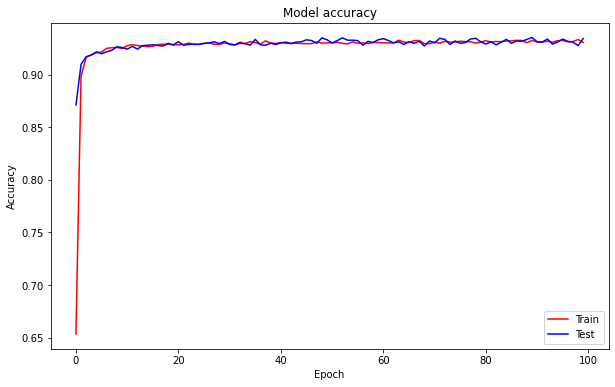

In [33]:
plot(history.history, 'Epoch', 'Accuracy', 'Model accuracy', 'accuracy', 'val_accuracy', 'lower right', 'epoch-accuracy')

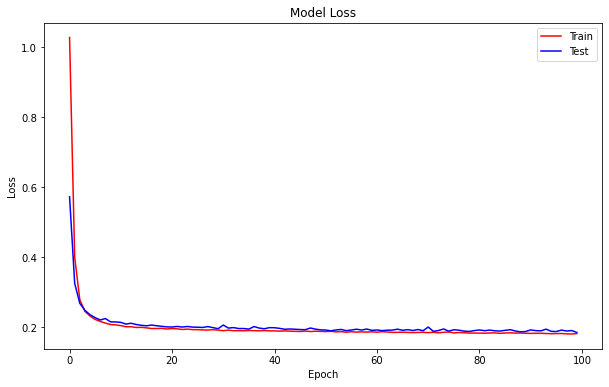

In [34]:
plot(history.history, 'Epoch', 'Loss', 'Model Loss', 'loss', 'val_loss', 'upper right', 'epoch-loss')

# Hyperparameter Tuning: Regularization

In [35]:
# def baseline_model_reg(regularizers): # dropout, regularization, initial_weights)
#     # create model
#     model = Sequential()
#     model.add(Dense(10, input_dim=X_train.shape[1], activation='selu'))
#     model.add(Dense(7, kernel_initializer = 'glorot_uniform', activity_regularizer=regularizers, activation='softmax'))
#     # Compile model
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model
def baseline_model_reg(layers, activation, regularizers):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1], activity_regularizer=regularizers))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes, activity_regularizer=regularizers))
            model.add(Activation(activation))

    # Note: no activation beyond this point        
    model.add(Dense(units = 7, kernel_initializer=glorotUniform, activation='softmax', activity_regularizer=regularizers)) 
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=baseline_model_reg, verbose=1)

batch_size = [64]
epochs = [100]
activation = ['selu']
# RMSprop, Adadelta, and Adam
# regularizers = ['l1', 'l2', 'l1_l2'] # Ref: https://www.kaggle.com/eikedehling/automatically-determine-the-best-keras-model
# param_grid = dict(regularizers=regularizers, batch_size = batch_size, epochs=epochs)
param_grid = {
    # 'regularizers': [ regularizers.l2(0.01), regularizers.l2(0.001), regularizers.l2(0.0001)],
    'layers': [[14, 10, 9]],
    'activation': activation,
    'regularizers': [ l1_regularizer, l2_regularizer, l1_l2_regularizer],
    'batch_size': batch_size,
    'epochs': epochs
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)


grid_result = grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

Epoch 1/100
136/136 [==============================] - 2s 5ms/step - loss: 1.6023 - accuracy: 0.4555
Epoch 2/100
136/136 [==============================] - 1s 4ms/step - loss: 0.9243 - accuracy: 0.8069
Epoch 3/100
136/136 [==============================] - 1s 4ms/step - loss: 0.7316 - accuracy: 0.8950
Epoch 4/100
136/136 [==============================] - 1s 4ms/step - loss: 0.6406 - accuracy: 0.9072
Epoch 5/100
136/136 [==============================] - 1s 5ms/step - loss: 0.5866 - accuracy: 0.9109
Epoch 6/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5472 - accuracy: 0.9132
Epoch 7/100
136/136 [==============================] - 0s 4ms/step - loss: 0.5160 - accuracy: 0.9174
Epoch 8/100
136/136 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0.9142
Epoch 9/100
136/136 [==============================] - 1s 4ms/step - loss: 0.4712 - accuracy: 0.9150
Epoch 10/100
136/136 [==============================] - 0s 4ms/step - loss: 0.4520 - accura

136/136 [==============================] - 1s 4ms/step - loss: 0.2862 - accuracy: 0.9288
Epoch 61/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2851 - accuracy: 0.9274
Epoch 62/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2858 - accuracy: 0.9281
Epoch 63/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2852 - accuracy: 0.9262
Epoch 64/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2842 - accuracy: 0.9268
Epoch 65/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2814 - accuracy: 0.9293
Epoch 66/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2815 - accuracy: 0.9298
Epoch 67/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2827 - accuracy: 0.9281
Epoch 68/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2833 - accuracy: 0.9278
Epoch 69/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2785 - accuracy: 

136/136 [==============================] - 1s 4ms/step - loss: 0.3822 - accuracy: 0.9236
Epoch 19/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.9237
Epoch 20/100
136/136 [==============================] - 0s 4ms/step - loss: 0.3728 - accuracy: 0.9243
Epoch 21/100
136/136 [==============================] - 0s 4ms/step - loss: 0.3664 - accuracy: 0.9270
Epoch 22/100
136/136 [==============================] - 1s 4ms/step - loss: 0.3636 - accuracy: 0.9242
Epoch 23/100
136/136 [==============================] - 0s 4ms/step - loss: 0.3593 - accuracy: 0.9237
Epoch 24/100
136/136 [==============================] - 0s 4ms/step - loss: 0.3544 - accuracy: 0.9240
Epoch 25/100
136/136 [==============================] - 1s 4ms/step - loss: 0.3537 - accuracy: 0.9242
Epoch 26/100
136/136 [==============================] - 1s 4ms/step - loss: 0.3488 - accuracy: 0.9233
Epoch 27/100
136/136 [==============================] - 0s 4ms/step - loss: 0.3461 - accuracy: 

136/136 [==============================] - 1s 4ms/step - loss: 0.2818 - accuracy: 0.9304
Epoch 78/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2837 - accuracy: 0.9258
Epoch 79/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2797 - accuracy: 0.9286
Epoch 80/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2836 - accuracy: 0.9271
Epoch 81/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2798 - accuracy: 0.9289
Epoch 82/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2793 - accuracy: 0.9287
Epoch 83/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2806 - accuracy: 0.9271
Epoch 84/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2786 - accuracy: 0.9266
Epoch 85/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2806 - accuracy: 0.9275
Epoch 86/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2793 - accuracy: 

136/136 [==============================] - 1s 4ms/step - loss: 0.2726 - accuracy: 0.9252
Epoch 36/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2671 - accuracy: 0.9279
Epoch 37/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2655 - accuracy: 0.9250
Epoch 38/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2622 - accuracy: 0.9253
Epoch 39/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2646 - accuracy: 0.9256
Epoch 40/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2622 - accuracy: 0.9272
Epoch 41/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2595 - accuracy: 0.9280
Epoch 42/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2612 - accuracy: 0.9267
Epoch 43/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2581 - accuracy: 0.9287
Epoch 44/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2566 - accuracy: 

136/136 [==============================] - 1s 5ms/step - loss: 0.2392 - accuracy: 0.9263
Epoch 94/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2410 - accuracy: 0.9249
Epoch 95/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2397 - accuracy: 0.9258
Epoch 96/100
136/136 [==============================] - 1s 6ms/step - loss: 0.2364 - accuracy: 0.9270
Epoch 97/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2394 - accuracy: 0.9251
Epoch 98/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2376 - accuracy: 0.9248
Epoch 99/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2362 - accuracy: 0.9277
Epoch 100/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9335
Epoch 1/100
136/136 [==============================] - 1s 6ms/step - loss: 1.7962 - accuracy: 0.5061
Epoch 2/100
136/136 [==============================] - 1s 4ms/step - loss: 1.0331 - accuracy: 0.8

136/136 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.9258
Epoch 52/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2477 - accuracy: 0.9282
Epoch 53/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2514 - accuracy: 0.9269
Epoch 54/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2513 - accuracy: 0.9267
Epoch 55/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2513 - accuracy: 0.9274
Epoch 56/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2465 - accuracy: 0.9281
Epoch 57/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2451 - accuracy: 0.9284
Epoch 58/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2490 - accuracy: 0.9255
Epoch 59/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.9252
Epoch 60/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2434 - accuracy: 

136/136 [==============================] - 1s 5ms/step - loss: 0.4985 - accuracy: 0.9177
Epoch 10/100
136/136 [==============================] - 1s 5ms/step - loss: 0.4785 - accuracy: 0.9174
Epoch 11/100
136/136 [==============================] - 1s 5ms/step - loss: 0.4624 - accuracy: 0.9189
Epoch 12/100
136/136 [==============================] - 1s 5ms/step - loss: 0.4497 - accuracy: 0.9189
Epoch 13/100
136/136 [==============================] - 1s 5ms/step - loss: 0.4370 - accuracy: 0.9196
Epoch 14/100
136/136 [==============================] - 1s 5ms/step - loss: 0.4272 - accuracy: 0.9189
Epoch 15/100
136/136 [==============================] - 1s 5ms/step - loss: 0.4184 - accuracy: 0.9207
Epoch 16/100
136/136 [==============================] - 1s 5ms/step - loss: 0.4099 - accuracy: 0.9198
Epoch 17/100
136/136 [==============================] - 1s 5ms/step - loss: 0.4017 - accuracy: 0.9199
Epoch 18/100
136/136 [==============================] - 1s 5ms/step - loss: 0.3956 - accuracy: 

136/136 [==============================] - 1s 5ms/step - loss: 0.2939 - accuracy: 0.9249
Epoch 69/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2908 - accuracy: 0.9249
Epoch 70/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2923 - accuracy: 0.9235
Epoch 71/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2895 - accuracy: 0.9265
Epoch 72/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2917 - accuracy: 0.9249
Epoch 73/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2896 - accuracy: 0.9270
Epoch 74/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2911 - accuracy: 0.9249
Epoch 75/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2894 - accuracy: 0.9250
Epoch 76/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2871 - accuracy: 0.9262
Epoch 77/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2905 - accuracy: 

136/136 [==============================] - 1s 5ms/step - loss: 0.3689 - accuracy: 0.9217
Epoch 27/100
136/136 [==============================] - 1s 5ms/step - loss: 0.3624 - accuracy: 0.9209
Epoch 28/100
136/136 [==============================] - 1s 5ms/step - loss: 0.3605 - accuracy: 0.9206
Epoch 29/100
136/136 [==============================] - 1s 5ms/step - loss: 0.3553 - accuracy: 0.9228
Epoch 30/100
136/136 [==============================] - 1s 5ms/step - loss: 0.3517 - accuracy: 0.9243
Epoch 31/100
136/136 [==============================] - 1s 5ms/step - loss: 0.3484 - accuracy: 0.9239
Epoch 32/100
136/136 [==============================] - 1s 5ms/step - loss: 0.3453 - accuracy: 0.9243
Epoch 33/100
136/136 [==============================] - 1s 5ms/step - loss: 0.3432 - accuracy: 0.9244
Epoch 34/100
136/136 [==============================] - 1s 5ms/step - loss: 0.3404 - accuracy: 0.9243
Epoch 35/100
136/136 [==============================] - 1s 5ms/step - loss: 0.3405 - accuracy: 

170/170 [==============================] - 1s 4ms/step - loss: 0.2281 - accuracy: 0.9279
Epoch 86/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2306 - accuracy: 0.9268
Epoch 87/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2298 - accuracy: 0.9285
Epoch 88/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2304 - accuracy: 0.9270
Epoch 89/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2306 - accuracy: 0.9267
Epoch 90/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2289 - accuracy: 0.9259
Epoch 91/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2279 - accuracy: 0.9286
Epoch 92/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2272 - accuracy: 0.9263
Epoch 93/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2261 - accuracy: 0.9271
Epoch 94/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2268 - accuracy: 

[0.929296326637268,
 {'activation': 'selu',
  'batch_size': 64,
  'epochs': 100,
  'layers': [14, 10, 9],
  'regularizers': <keras.regularizers.L2 at 0x18034f5db50>}]

In [36]:
model = baseline_model_reg([14, 10, 9], 'selu', regularizers=l2_regularizer)
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
170/170 [==============================] - 1s 6ms/step - loss: 1.4630 - accuracy: 0.5911 - val_loss: 1.0304 - val_accuracy: 0.7671
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 0.8476 - accuracy: 0.8449 - val_loss: 0.7174 - val_accuracy: 0.8870
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 0.6278 - accuracy: 0.8991 - val_loss: 0.5731 - val_accuracy: 0.9096
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 0.5266 - accuracy: 0.9099 - val_loss: 0.5023 - val_accuracy: 0.9121
Epoch 5/100
170/170 [==============================] - 1s 4ms/step - loss: 0.4712 - accuracy: 0.9122 - val_loss: 0.4558 - val_accuracy: 0.9136
Epoch 6/100
170/170 [==============================] - 1s 4ms/step - loss: 0.4324 - accuracy: 0.9177 - val_loss: 0.4223 - val_accuracy: 0.9151
Epoch 7/100
170/170 [==============================] - 1s 4ms/step - loss: 0.4062 - accuracy: 0.9162 - val_loss: 0.3989 - val_accuracy: 0.9169

Epoch 58/100
170/170 [==============================] - 1s 5ms/step - loss: 0.2390 - accuracy: 0.9260 - val_loss: 0.2349 - val_accuracy: 0.9306
Epoch 59/100
170/170 [==============================] - 1s 5ms/step - loss: 0.2360 - accuracy: 0.9278 - val_loss: 0.2346 - val_accuracy: 0.9321
Epoch 60/100
170/170 [==============================] - 1s 5ms/step - loss: 0.2342 - accuracy: 0.9311 - val_loss: 0.2307 - val_accuracy: 0.9317
Epoch 61/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2356 - accuracy: 0.9267 - val_loss: 0.2333 - val_accuracy: 0.9317
Epoch 62/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2379 - accuracy: 0.9253 - val_loss: 0.2370 - val_accuracy: 0.9295
Epoch 63/100
170/170 [==============================] - 1s 5ms/step - loss: 0.2367 - accuracy: 0.9257 - val_loss: 0.2314 - val_accuracy: 0.9347
Epoch 64/100
170/170 [==============================] - 1s 5ms/step - loss: 0.2329 - accuracy: 0.9284 - val_loss: 0.2310 - val_accuracy:

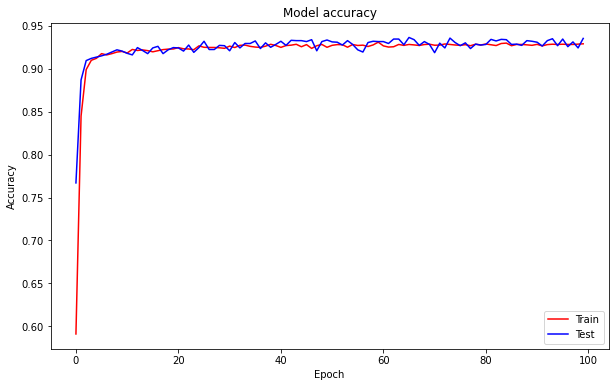

In [37]:
plot(history.history, 'Epoch', 'Accuracy', 'Model accuracy', 'accuracy', 'val_accuracy', 'lower right', 'reg-epoch-accuracy')

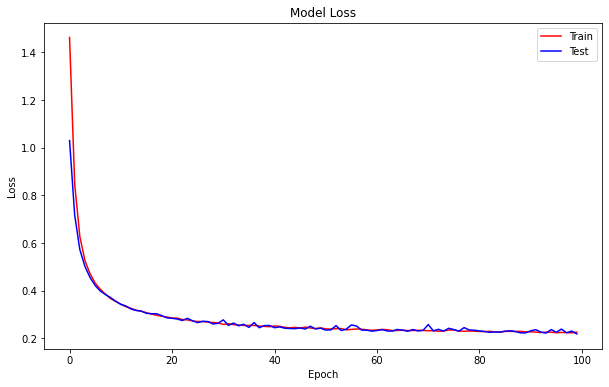

In [38]:
plot(history.history, 'Epoch', 'Loss', 'Model Loss', 'loss', 'val_loss', 'upper right', 'reg-epoch-loss')

# Hyperparameter Tuning: Dropout

In [40]:
# define baseline model
def baseline_model_dropout(layers, regularizers, dropout, activation='selu'):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(dropout))
        else:
            model.add(Dense(nodes, activity_regularizer=regularizers))
            model.add(Activation(activation))
            model.add(Dropout(dropout))
    # Note: no activation beyond this point        
    model.add(Dense(units=7, kernel_initializer=glorotUniform, activation='softmax')) 
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=baseline_model_dropout, verbose=1)

layers = [[14, 10, 9]]
batch_size = [64]
epochs = [100]

# param_grid = dict(layers=layers, activation=activations, batch_size = [64, 128, 256], epochs=[100])
param_grid = {
    # 'regularizers': [ regularizers.l2(0.01), regularizers.l2(0.001), regularizers.l2(0.0001)],
    'layers': layers,
    'dropout': [0.1, 0.3],
    'regularizers': [l2_regularizer],
    'batch_size': batch_size,
    'epochs': epochs
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)


grid_result = grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

Epoch 1/100
136/136 [==============================] - 1s 5ms/step - loss: 1.8188 - accuracy: 0.3978
Epoch 2/100
136/136 [==============================] - 1s 4ms/step - loss: 1.1625 - accuracy: 0.6472
Epoch 3/100
136/136 [==============================] - 1s 4ms/step - loss: 0.9474 - accuracy: 0.7319
Epoch 4/100
136/136 [==============================] - 1s 4ms/step - loss: 0.8077 - accuracy: 0.7885
Epoch 5/100
136/136 [==============================] - 1s 4ms/step - loss: 0.7134 - accuracy: 0.8294
Epoch 6/100
136/136 [==============================] - 1s 4ms/step - loss: 0.6514 - accuracy: 0.8461
Epoch 7/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5998 - accuracy: 0.8615
Epoch 8/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5681 - accuracy: 0.8677
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 0.5343 - accuracy: 0.8765
Epoch 10/100
136/136 [==============================] - 0s 3ms/step - loss: 0.5145 - accura

136/136 [==============================] - 1s 5ms/step - loss: 0.2993 - accuracy: 0.9098
Epoch 61/100
136/136 [==============================] - 1s 4ms/step - loss: 0.3007 - accuracy: 0.9106
Epoch 62/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2976 - accuracy: 0.9113
Epoch 63/100
136/136 [==============================] - 0s 4ms/step - loss: 0.3001 - accuracy: 0.9143
Epoch 64/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.9100
Epoch 65/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.9102
Epoch 66/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2997 - accuracy: 0.9101
Epoch 67/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2958 - accuracy: 0.9080
Epoch 68/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.9131
Epoch 69/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 

136/136 [==============================] - 1s 5ms/step - loss: 0.4145 - accuracy: 0.8879
Epoch 19/100
136/136 [==============================] - 1s 5ms/step - loss: 0.4067 - accuracy: 0.8922
Epoch 20/100
136/136 [==============================] - 1s 5ms/step - loss: 0.4027 - accuracy: 0.8925
Epoch 21/100
136/136 [==============================] - 1s 4ms/step - loss: 0.3957 - accuracy: 0.8951
Epoch 22/100
136/136 [==============================] - 1s 4ms/step - loss: 0.3893 - accuracy: 0.8972
Epoch 23/100
136/136 [==============================] - 1s 4ms/step - loss: 0.3838 - accuracy: 0.8982
Epoch 24/100
136/136 [==============================] - 1s 4ms/step - loss: 0.3791 - accuracy: 0.8975
Epoch 25/100
136/136 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8942
Epoch 26/100
136/136 [==============================] - 0s 4ms/step - loss: 0.3740 - accuracy: 0.8955
Epoch 27/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3735 - accuracy: 

136/136 [==============================] - 1s 5ms/step - loss: 0.2941 - accuracy: 0.9081
Epoch 78/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2930 - accuracy: 0.9089
Epoch 79/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2919 - accuracy: 0.9064
Epoch 80/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2927 - accuracy: 0.9081
Epoch 81/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2864 - accuracy: 0.9111
Epoch 82/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2932 - accuracy: 0.9064
Epoch 83/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2890 - accuracy: 0.9114
Epoch 84/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2907 - accuracy: 0.9091
Epoch 85/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2830 - accuracy: 0.9123
Epoch 86/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2860 - accuracy: 

136/136 [==============================] - 1s 5ms/step - loss: 0.5804 - accuracy: 0.8213
Epoch 36/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5683 - accuracy: 0.8193
Epoch 37/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5624 - accuracy: 0.8292
Epoch 38/100
136/136 [==============================] - 1s 5ms/step - loss: 0.5696 - accuracy: 0.8221
Epoch 39/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5569 - accuracy: 0.8282
Epoch 40/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5649 - accuracy: 0.8261
Epoch 41/100
136/136 [==============================] - 1s 5ms/step - loss: 0.5698 - accuracy: 0.8268
Epoch 42/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5615 - accuracy: 0.8239
Epoch 43/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5551 - accuracy: 0.8261
Epoch 44/100
136/136 [==============================] - 1s 5ms/step - loss: 0.5468 - accuracy: 

136/136 [==============================] - 1s 4ms/step - loss: 0.4883 - accuracy: 0.8454
Epoch 95/100
136/136 [==============================] - 1s 4ms/step - loss: 0.4822 - accuracy: 0.8471
Epoch 96/100
136/136 [==============================] - 1s 4ms/step - loss: 0.4699 - accuracy: 0.8512
Epoch 97/100
136/136 [==============================] - 1s 4ms/step - loss: 0.4786 - accuracy: 0.8469
Epoch 98/100
136/136 [==============================] - 1s 4ms/step - loss: 0.4618 - accuracy: 0.8508
Epoch 99/100
136/136 [==============================] - 1s 4ms/step - loss: 0.4821 - accuracy: 0.8472
Epoch 100/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.9220
Epoch 1/100
136/136 [==============================] - 1s 4ms/step - loss: 2.3756 - accuracy: 0.2478
Epoch 2/100
136/136 [==============================] - 1s 4ms/step - loss: 1.5611 - accuracy: 0.4559
Epoch 3/100
136/136 [==============================] - 1s 4ms/step - loss: 1.3138 - accuracy: 0.54

136/136 [==============================] - 1s 4ms/step - loss: 0.5004 - accuracy: 0.8458
Epoch 53/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5009 - accuracy: 0.8453
Epoch 54/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5068 - accuracy: 0.8411
Epoch 55/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5056 - accuracy: 0.8413
Epoch 56/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5086 - accuracy: 0.8421
Epoch 57/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5024 - accuracy: 0.8430
Epoch 58/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5097 - accuracy: 0.8421
Epoch 59/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5012 - accuracy: 0.8463
Epoch 60/100
136/136 [==============================] - 1s 4ms/step - loss: 0.5070 - accuracy: 0.8392
Epoch 61/100
136/136 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 

[0.9244046568870544,
 {'batch_size': 64,
  'dropout': 0.1,
  'epochs': 100,
  'layers': [14, 10, 9],
  'regularizers': <keras.regularizers.L2 at 0x18034f5db50>}]

In [41]:
model = baseline_model_dropout([14, 10, 9], l2_regularizer, 0.1)
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
170/170 [==============================] - 1s 6ms/step - loss: 1.7302 - accuracy: 0.4754 - val_loss: 1.0062 - val_accuracy: 0.8114
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 1.0522 - accuracy: 0.7221 - val_loss: 0.7639 - val_accuracy: 0.8845
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 0.8700 - accuracy: 0.7861 - val_loss: 0.6349 - val_accuracy: 0.8977
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 0.7426 - accuracy: 0.8307 - val_loss: 0.5498 - val_accuracy: 0.9070
Epoch 5/100
170/170 [==============================] - 1s 4ms/step - loss: 0.6575 - accuracy: 0.8477 - val_loss: 0.4897 - val_accuracy: 0.9155
Epoch 6/100
170/170 [==============================] - 1s 4ms/step - loss: 0.5868 - accuracy: 0.8708 - val_loss: 0.4478 - val_accuracy: 0.9125
Epoch 7/100
170/170 [==============================] - 1s 4ms/step - loss: 0.5458 - accuracy: 0.8766 - val_loss: 0.4151 - val_accuracy: 0.9188

Epoch 58/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2974 - accuracy: 0.9080 - val_loss: 0.2407 - val_accuracy: 0.9221
Epoch 59/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2996 - accuracy: 0.9069 - val_loss: 0.2401 - val_accuracy: 0.9251
Epoch 60/100
170/170 [==============================] - 1s 5ms/step - loss: 0.2949 - accuracy: 0.9106 - val_loss: 0.2402 - val_accuracy: 0.9199
Epoch 61/100
170/170 [==============================] - 1s 5ms/step - loss: 0.2909 - accuracy: 0.9092 - val_loss: 0.2411 - val_accuracy: 0.9243
Epoch 62/100
170/170 [==============================] - 1s 5ms/step - loss: 0.2925 - accuracy: 0.9126 - val_loss: 0.2401 - val_accuracy: 0.9243
Epoch 63/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2927 - accuracy: 0.9057 - val_loss: 0.2368 - val_accuracy: 0.9214
Epoch 64/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2920 - accuracy: 0.9092 - val_loss: 0.2399 - val_accuracy:

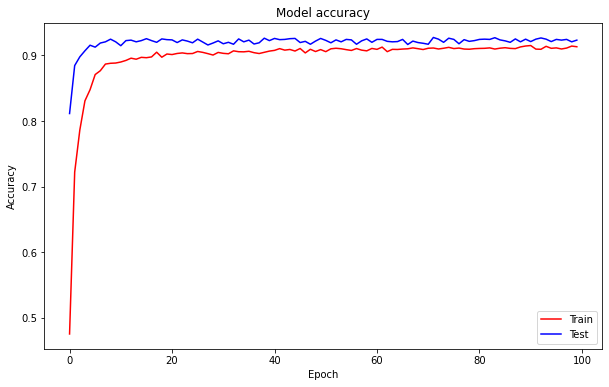

In [42]:
plot(history.history, 'Epoch', 'Accuracy', 'Model accuracy', 'accuracy', 'val_accuracy', 'lower right', 'dropout-epoch-accuracy')

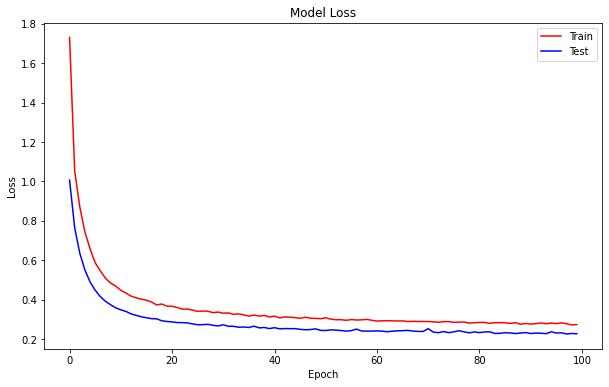

In [43]:
plot(history.history, 'Epoch', 'Loss', 'Model Loss', 'loss', 'val_loss', 'upper right', 'dropout-epoch-loss')

# Hyperparameter Tuning: Initialization Weights

In [44]:
# define baseline model
def baseline_model_init_weights(layers, init_weights, regularizers=l2_regularizer, activation='selu'):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes, activity_regularizer=regularizers))
            model.add(Activation(activation))
    # Note: no activation beyond this point        
    model.add(Dense(units = 7, kernel_initializer = init_weights, activation = 'softmax')) 
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=baseline_model_init_weights, verbose=1)

layers = [[14, 10, 9]]
batch_size = [64]
epochs = [100]

# param_grid = dict(layers=layers, activation=activations, batch_size = [64, 128, 256], epochs=[100])
param_grid = {
    # 'regularizers': [ regularizers.l2(0.01), regularizers.l2(0.001), regularizers.l2(0.0001)],
    'layers': layers,
    # 'init_weights': ['glorot_uniform', 'he_uniform', 'random_normal'],
    'init_weights': initializer_weights,
    'batch_size': batch_size,
    'epochs': epochs
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid_result = grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

Epoch 1/100
136/136 [==============================] - 1s 4ms/step - loss: 1.5870 - accuracy: 0.5111
Epoch 2/100
136/136 [==============================] - 0s 3ms/step - loss: 0.9001 - accuracy: 0.7872
Epoch 3/100
136/136 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.8922
Epoch 4/100
136/136 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.9124
Epoch 5/100
136/136 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.9152
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.9153
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.9182
Epoch 8/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.9173
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.9172
Epoch 10/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3479 - accura

136/136 [==============================] - 0s 3ms/step - loss: 0.2210 - accuracy: 0.9298
Epoch 61/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2202 - accuracy: 0.9298
Epoch 62/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2197 - accuracy: 0.9298
Epoch 63/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.9294
Epoch 64/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2194 - accuracy: 0.9286
Epoch 65/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9300
Epoch 66/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2182 - accuracy: 0.9324
Epoch 67/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.9309
Epoch 68/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9289
Epoch 69/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2167 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.2809 - accuracy: 0.9237
Epoch 19/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2789 - accuracy: 0.9255
Epoch 20/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.9251
Epoch 21/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2735 - accuracy: 0.9252
Epoch 22/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.9251
Epoch 23/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2670 - accuracy: 0.9244
Epoch 24/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2638 - accuracy: 0.9249
Epoch 25/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.9264
Epoch 26/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2605 - accuracy: 0.9245
Epoch 27/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 

136/136 [==============================] - 1s 4ms/step - loss: 0.2149 - accuracy: 0.9302
Epoch 78/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2163 - accuracy: 0.9294
Epoch 79/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2138 - accuracy: 0.9299
Epoch 80/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2148 - accuracy: 0.9289
Epoch 81/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2155 - accuracy: 0.9290
Epoch 82/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2133 - accuracy: 0.9300
Epoch 83/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2144 - accuracy: 0.9318
Epoch 84/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9303
Epoch 85/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9303
Epoch 86/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2127 - accuracy: 

136/136 [==============================] - 0s 4ms/step - loss: 0.2387 - accuracy: 0.9267
Epoch 36/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2367 - accuracy: 0.9275
Epoch 37/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2359 - accuracy: 0.9270
Epoch 38/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2321 - accuracy: 0.9259
Epoch 39/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9271
Epoch 40/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.9295
Epoch 41/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2303 - accuracy: 0.9297
Epoch 42/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2303 - accuracy: 0.9295
Epoch 43/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2276 - accuracy: 0.9292
Epoch 44/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2277 - accuracy: 

Epoch 94/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.9278
Epoch 95/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2143 - accuracy: 0.9287
Epoch 96/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2140 - accuracy: 0.9277
Epoch 97/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2136 - accuracy: 0.9278
Epoch 98/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.9289
Epoch 99/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2114 - accuracy: 0.9300
Epoch 100/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9331
Epoch 1/100
136/136 [==============================] - 1s 3ms/step - loss: 1.6562 - accuracy: 0.4945
Epoch 2/100
136/136 [==============================] - 1s 4ms/step - loss: 0.7987 - accuracy: 0.8501
Epoch 3/100
136/136 [==============================] - 1s 4ms/step - loss: 0.6172 - a

136/136 [==============================] - 0s 4ms/step - loss: 0.2242 - accuracy: 0.9284
Epoch 53/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2263 - accuracy: 0.9275
Epoch 54/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2286 - accuracy: 0.9288
Epoch 55/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.9273
Epoch 56/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 0.9292
Epoch 57/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2221 - accuracy: 0.9304
Epoch 58/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2287 - accuracy: 0.9257
Epoch 59/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2239 - accuracy: 0.9282
Epoch 60/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2198 - accuracy: 0.9296
Epoch 61/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2206 - accuracy: 

136/136 [==============================] - 1s 4ms/step - loss: 0.3562 - accuracy: 0.9220
Epoch 11/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.9248
Epoch 12/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.9244
Epoch 13/100
136/136 [==============================] - 1s 5ms/step - loss: 0.3225 - accuracy: 0.9243
Epoch 14/100
136/136 [==============================] - 0s 4ms/step - loss: 0.3157 - accuracy: 0.9251
Epoch 15/100
136/136 [==============================] - 1s 4ms/step - loss: 0.3091 - accuracy: 0.9252
Epoch 16/100
136/136 [==============================] - 1s 4ms/step - loss: 0.3034 - accuracy: 0.9256
Epoch 17/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2965 - accuracy: 0.9245
Epoch 18/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2934 - accuracy: 0.9238
Epoch 19/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2865 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.2201 - accuracy: 0.9266
Epoch 70/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2197 - accuracy: 0.9268
Epoch 71/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 0.9300
Epoch 72/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9278
Epoch 73/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9296
Epoch 74/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9292
Epoch 75/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9273
Epoch 76/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.9302
Epoch 77/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.9272
Epoch 78/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 0.2635 - accuracy: 0.9265
Epoch 28/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.9281
Epoch 29/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 0.9262
Epoch 30/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2571 - accuracy: 0.9266
Epoch 31/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.9252
Epoch 32/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2535 - accuracy: 0.9259
Epoch 33/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.9262
Epoch 34/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.9263
Epoch 35/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2518 - accuracy: 0.9257
Epoch 36/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2465 - accuracy: 

170/170 [==============================] - 1s 3ms/step - loss: 0.2080 - accuracy: 0.9300
Epoch 87/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2074 - accuracy: 0.9299
Epoch 88/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2072 - accuracy: 0.9295
Epoch 89/100
170/170 [==============================] - 1s 5ms/step - loss: 0.2085 - accuracy: 0.9297
Epoch 90/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2066 - accuracy: 0.9292
Epoch 91/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2077 - accuracy: 0.9308
Epoch 92/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2062 - accuracy: 0.9291
Epoch 93/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2055 - accuracy: 0.9286
Epoch 94/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2053 - accuracy: 0.9296
Epoch 95/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2046 - accuracy: 

[0.92846519947052,
 {'batch_size': 64,
  'epochs': 100,
  'init_weights': <keras.initializers.initializers_v2.GlorotUniform at 0x18034f5d910>,
  'layers': [14, 10, 9]}]

In [45]:
model = baseline_model_init_weights([14, 10, 9], glorotUniform, l2_regularizer)
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
170/170 [==============================] - 1s 5ms/step - loss: 1.3236 - accuracy: 0.6337 - val_loss: 0.9236 - val_accuracy: 0.7866
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 0.7470 - accuracy: 0.8584 - val_loss: 0.6300 - val_accuracy: 0.9085
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 0.5536 - accuracy: 0.9086 - val_loss: 0.5047 - val_accuracy: 0.9129
Epoch 4/100
170/170 [==============================] - 1s 5ms/step - loss: 0.4671 - accuracy: 0.9153 - val_loss: 0.4423 - val_accuracy: 0.9155
Epoch 5/100
170/170 [==============================] - 1s 5ms/step - loss: 0.4207 - accuracy: 0.9167 - val_loss: 0.4036 - val_accuracy: 0.9217
Epoch 6/100
170/170 [==============================] - 1s 4ms/step - loss: 0.3890 - accuracy: 0.9190 - val_loss: 0.3771 - val_accuracy: 0.9158
Epoch 7/100
170/170 [==============================] - 1s 4ms/step - loss: 0.3663 - accuracy: 0.9187 - val_loss: 0.3521 - val_accuracy: 0.9225

Epoch 58/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2234 - accuracy: 0.9258 - val_loss: 0.2309 - val_accuracy: 0.9232
Epoch 59/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2229 - accuracy: 0.9256 - val_loss: 0.2297 - val_accuracy: 0.9288
Epoch 60/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2216 - accuracy: 0.9277 - val_loss: 0.2236 - val_accuracy: 0.9295
Epoch 61/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2208 - accuracy: 0.9255 - val_loss: 0.2231 - val_accuracy: 0.9273
Epoch 62/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2221 - accuracy: 0.9269 - val_loss: 0.2274 - val_accuracy: 0.9284
Epoch 63/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2216 - accuracy: 0.9258 - val_loss: 0.2217 - val_accuracy: 0.9299
Epoch 64/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2177 - accuracy: 0.9277 - val_loss: 0.2245 - val_accuracy:

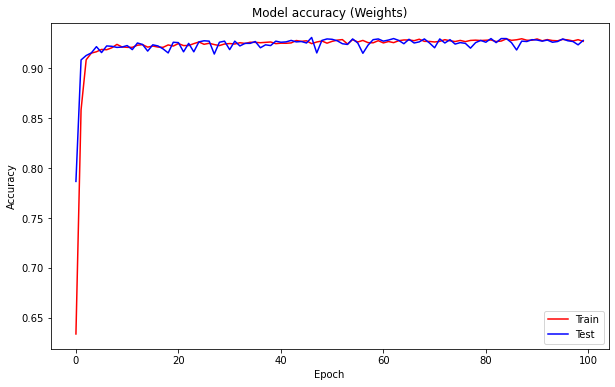

In [46]:
plot(history.history, 'Epoch', 'Accuracy', 'Model accuracy (Weights)', 'accuracy', 'val_accuracy', 'lower right', 'weights-epoch-accuracy')

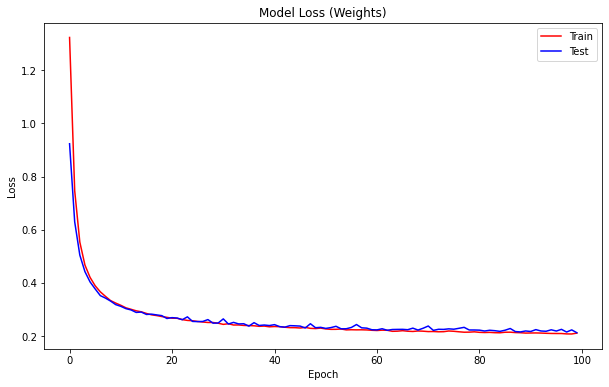

In [47]:
plot(history.history, 'Epoch', 'Loss', 'Model Loss (Weights)', 'loss', 'val_loss', 'upper right', 'weights-epoch-loss')

# Hyperparameter Tuning: Optimizers

In [49]:
# define baseline model
def baseline_model_optimizers(layers, optimizers, init_weights=glorotUniform, regularizers=l2_regularizer, activation='selu'):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes, activity_regularizer=regularizers))
            model.add(Activation(activation))
    # Note: no activation beyond this point        
    model.add(Dense(units = 7, kernel_initializer = init_weights, activation = 'softmax')) 
    
    model.compile(optimizer=optimizers, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=baseline_model_optimizers, verbose=1)

layers = [[14, 10, 9]]
batch_size = [64]
epochs = [100]

# param_grid = dict(layers=layers, activation=activations, batch_size = [64, 128, 256], epochs=[100])
param_grid = {
    # 'regularizers': [ regularizers.l2(0.01), regularizers.l2(0.001), regularizers.l2(0.0001)],
    'layers': layers,
    'optimizers' : ['adam', 'adadelta', 'rmsprop'],
    'batch_size': batch_size,
    'epochs': epochs
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid_result = grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

Epoch 1/100
136/136 [==============================] - 1s 5ms/step - loss: 1.6632 - accuracy: 0.4495
Epoch 2/100
136/136 [==============================] - 1s 4ms/step - loss: 0.8975 - accuracy: 0.8414
Epoch 3/100
136/136 [==============================] - 1s 4ms/step - loss: 0.6505 - accuracy: 0.8937
Epoch 4/100
136/136 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.9047
Epoch 5/100
136/136 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.9103
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.9122
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.9168
Epoch 8/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3742 - accuracy: 0.9165
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.9160
Epoch 10/100
136/136 [==============================] - 0s 3ms/step - loss: 0.3433 - accura

136/136 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9310
Epoch 61/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9302
Epoch 62/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.9305
Epoch 63/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9293: 0s - loss: 0.2192 - accura
Epoch 64/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9295
Epoch 65/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2167 - accuracy: 0.9296
Epoch 66/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 0.9310
Epoch 67/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9317
Epoch 68/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9305
Epoch 69/100
136/136 [==============================] - 0s 3ms/step

136/136 [==============================] - 0s 3ms/step - loss: 0.2944 - accuracy: 0.9234
Epoch 19/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.9238
Epoch 20/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2863 - accuracy: 0.9247
Epoch 21/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2828 - accuracy: 0.9243
Epoch 22/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2804 - accuracy: 0.9255
Epoch 23/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2759 - accuracy: 0.9252
Epoch 24/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2734 - accuracy: 0.9257
Epoch 25/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2718 - accuracy: 0.9249
Epoch 26/100
136/136 [==============================] - 0s 4ms/step - loss: 0.2679 - accuracy: 0.9237
Epoch 27/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2660 - accuracy: 

136/136 [==============================] - 0s 4ms/step - loss: 0.2097 - accuracy: 0.9307
Epoch 78/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.9316
Epoch 79/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9310
Epoch 80/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2078 - accuracy: 0.9309
Epoch 81/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2080 - accuracy: 0.9307
Epoch 82/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9314
Epoch 83/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2084 - accuracy: 0.9294
Epoch 84/100
136/136 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9307
Epoch 85/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2073 - accuracy: 0.9312
Epoch 86/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2086 - accuracy: 

136/136 [==============================] - 0s 3ms/step - loss: 1.9223 - accuracy: 0.3764
Epoch 36/100
136/136 [==============================] - 1s 5ms/step - loss: 1.9176 - accuracy: 0.3776
Epoch 37/100
136/136 [==============================] - 0s 3ms/step - loss: 1.9130 - accuracy: 0.3796
Epoch 38/100
136/136 [==============================] - 0s 4ms/step - loss: 1.9085 - accuracy: 0.3810
Epoch 39/100
136/136 [==============================] - 0s 3ms/step - loss: 1.9040 - accuracy: 0.3827
Epoch 40/100
136/136 [==============================] - 1s 4ms/step - loss: 1.8995 - accuracy: 0.3850
Epoch 41/100
136/136 [==============================] - 1s 4ms/step - loss: 1.8951 - accuracy: 0.3861
Epoch 42/100
136/136 [==============================] - 1s 4ms/step - loss: 1.8907 - accuracy: 0.3873
Epoch 43/100
136/136 [==============================] - 0s 3ms/step - loss: 1.8862 - accuracy: 0.3884
Epoch 44/100
136/136 [==============================] - 0s 3ms/step - loss: 1.8819 - accuracy: 

136/136 [==============================] - 0s 4ms/step - loss: 1.9894 - accuracy: 0.2531
Epoch 95/100
136/136 [==============================] - 1s 4ms/step - loss: 1.9857 - accuracy: 0.2560
Epoch 96/100
136/136 [==============================] - 0s 3ms/step - loss: 1.9821 - accuracy: 0.2586
Epoch 97/100
136/136 [==============================] - 0s 3ms/step - loss: 1.9784 - accuracy: 0.2626
Epoch 98/100
136/136 [==============================] - 0s 3ms/step - loss: 1.9748 - accuracy: 0.2658
Epoch 99/100
136/136 [==============================] - 0s 3ms/step - loss: 1.9712 - accuracy: 0.2694
Epoch 100/100
34/34 [==============================] - 0s 4ms/step - loss: 1.9758 - accuracy: 0.2663
Epoch 1/100
136/136 [==============================] - 1s 3ms/step - loss: 2.5955 - accuracy: 0.0617
Epoch 2/100
136/136 [==============================] - 1s 4ms/step - loss: 2.5873 - accuracy: 0.0623
Epoch 3/100
136/136 [==============================] - 0s 3ms/step - loss: 2.5785 - accuracy: 0.06

136/136 [==============================] - 0s 3ms/step - loss: 2.7249 - accuracy: 0.1246
Epoch 53/100
136/136 [==============================] - 0s 3ms/step - loss: 2.7122 - accuracy: 0.1251
Epoch 54/100
136/136 [==============================] - 0s 3ms/step - loss: 2.6997 - accuracy: 0.1257
Epoch 55/100
136/136 [==============================] - 0s 3ms/step - loss: 2.6872 - accuracy: 0.1261
Epoch 56/100
136/136 [==============================] - 1s 4ms/step - loss: 2.6748 - accuracy: 0.1270
Epoch 57/100
136/136 [==============================] - 0s 3ms/step - loss: 2.6625 - accuracy: 0.1275
Epoch 58/100
136/136 [==============================] - 1s 4ms/step - loss: 2.6502 - accuracy: 0.1284
Epoch 59/100
136/136 [==============================] - 0s 4ms/step - loss: 2.6381 - accuracy: 0.1285
Epoch 60/100
136/136 [==============================] - 0s 3ms/step - loss: 2.6260 - accuracy: 0.1293
Epoch 61/100
136/136 [==============================] - 1s 4ms/step - loss: 2.6140 - accuracy: 

136/136 [==============================] - 1s 7ms/step - loss: 0.2999 - accuracy: 0.9233
Epoch 11/100
136/136 [==============================] - 1s 7ms/step - loss: 0.2915 - accuracy: 0.9249
Epoch 12/100
136/136 [==============================] - 1s 6ms/step - loss: 0.2853 - accuracy: 0.9253
Epoch 13/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2794 - accuracy: 0.9251
Epoch 14/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2745 - accuracy: 0.9251
Epoch 15/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2695 - accuracy: 0.9266
Epoch 16/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2664 - accuracy: 0.9247
Epoch 17/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2614 - accuracy: 0.9256
Epoch 18/100
136/136 [==============================] - 1s 6ms/step - loss: 0.2604 - accuracy: 0.9242
Epoch 19/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2565 - accuracy: 

136/136 [==============================] - 1s 5ms/step - loss: 0.2172 - accuracy: 0.9274
Epoch 70/100
136/136 [==============================] - 1s 6ms/step - loss: 0.2155 - accuracy: 0.9289
Epoch 71/100
136/136 [==============================] - 1s 6ms/step - loss: 0.2133 - accuracy: 0.9279
Epoch 72/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2155 - accuracy: 0.9297
Epoch 73/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2144 - accuracy: 0.9304
Epoch 74/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2150 - accuracy: 0.9293
Epoch 75/100
136/136 [==============================] - 1s 6ms/step - loss: 0.2139 - accuracy: 0.9300
Epoch 76/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2140 - accuracy: 0.9300
Epoch 77/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2134 - accuracy: 0.9300
Epoch 78/100
136/136 [==============================] - 1s 6ms/step - loss: 0.2145 - accuracy: 

136/136 [==============================] - 1s 5ms/step - loss: 0.2454 - accuracy: 0.9259
Epoch 28/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2444 - accuracy: 0.9258
Epoch 29/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2427 - accuracy: 0.9266
Epoch 30/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2427 - accuracy: 0.9250
Epoch 31/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2410 - accuracy: 0.9266
Epoch 32/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2406 - accuracy: 0.9264
Epoch 33/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2403 - accuracy: 0.9249
Epoch 34/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2377 - accuracy: 0.9272
Epoch 35/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2369 - accuracy: 0.9280
Epoch 36/100
136/136 [==============================] - 1s 5ms/step - loss: 0.2355 - accuracy: 

170/170 [==============================] - 1s 3ms/step - loss: 0.2156 - accuracy: 0.9275
Epoch 87/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2144 - accuracy: 0.9283
Epoch 88/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2136 - accuracy: 0.9279
Epoch 89/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2141 - accuracy: 0.9265
Epoch 90/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2136 - accuracy: 0.9280
Epoch 91/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2122 - accuracy: 0.9273
Epoch 92/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2123 - accuracy: 0.9279
Epoch 93/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2108 - accuracy: 0.9278
Epoch 94/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2111 - accuracy: 0.9279
Epoch 95/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2112 - accuracy: 

[0.9279117465019227,
 {'batch_size': 64,
  'epochs': 100,
  'layers': [14, 10, 9],
  'optimizers': 'adam'}]

In [50]:
model = baseline_model_optimizers([14, 10, 9], 'adam', glorotUniform, l2_regularizer)
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
170/170 [==============================] - 1s 5ms/step - loss: 1.4443 - accuracy: 0.5614 - val_loss: 0.9519 - val_accuracy: 0.8291
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 0.7890 - accuracy: 0.8786 - val_loss: 0.6741 - val_accuracy: 0.9022
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 0.5998 - accuracy: 0.9039 - val_loss: 0.5414 - val_accuracy: 0.9136
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 0.5011 - accuracy: 0.9113 - val_loss: 0.4695 - val_accuracy: 0.9166
Epoch 5/100
170/170 [==============================] - 1s 4ms/step - loss: 0.4457 - accuracy: 0.9123 - val_loss: 0.4243 - val_accuracy: 0.9181
Epoch 6/100
170/170 [==============================] - 1s 4ms/step - loss: 0.4065 - accuracy: 0.9161 - val_loss: 0.3949 - val_accuracy: 0.9121
Epoch 7/100
170/170 [==============================] - 1s 4ms/step - loss: 0.3790 - accuracy: 0.9165 - val_loss: 0.3666 - val_accuracy: 0.9232

Epoch 58/100
170/170 [==============================] - 1s 5ms/step - loss: 0.2194 - accuracy: 0.9296 - val_loss: 0.2201 - val_accuracy: 0.9302
Epoch 59/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2197 - accuracy: 0.9288 - val_loss: 0.2199 - val_accuracy: 0.9299
Epoch 60/100
170/170 [==============================] - 1s 3ms/step - loss: 0.2176 - accuracy: 0.9310 - val_loss: 0.2163 - val_accuracy: 0.9317
Epoch 61/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2167 - accuracy: 0.9283 - val_loss: 0.2164 - val_accuracy: 0.9324
Epoch 62/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2185 - accuracy: 0.9279 - val_loss: 0.2187 - val_accuracy: 0.9306
Epoch 63/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2175 - accuracy: 0.9286 - val_loss: 0.2133 - val_accuracy: 0.9295
Epoch 64/100
170/170 [==============================] - 1s 4ms/step - loss: 0.2142 - accuracy: 0.9311 - val_loss: 0.2164 - val_accuracy:

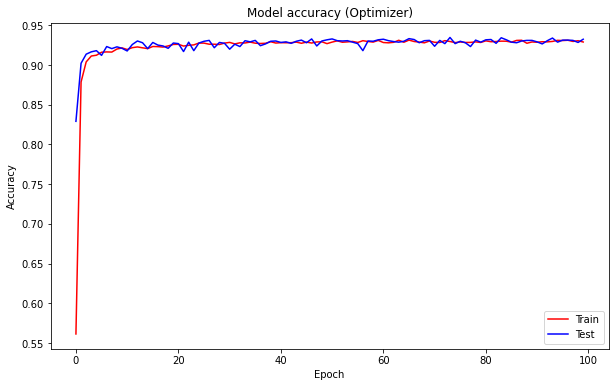

In [51]:
plot(history.history, 'Epoch', 'Accuracy', 'Model accuracy (Optimizer)', 'accuracy', 'val_accuracy', 'lower right', 'optimzer-epoch-accuracy')

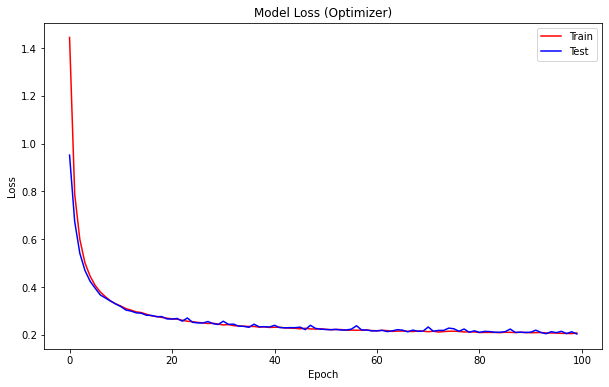

In [52]:
plot(history.history, 'Epoch', 'Loss', 'Model Loss (Optimizer)', 'loss', 'val_loss', 'upper right', 'optimizer-epoch-loss')

# Early Stopping

In [63]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', patience=100)
model = baseline_model_optimizers([14, 10, 9], 'adam', glorotUniform, l2_regularizer)
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=2000, batch_size=64, callbacks=[es])

Epoch 1/2000
170/170 [==============================] - 1s 6ms/step - loss: 1.2794 - accuracy: 0.6601 - val_loss: 0.8543 - val_accuracy: 0.8475
Epoch 2/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.6976 - accuracy: 0.8811 - val_loss: 0.5941 - val_accuracy: 0.9037
Epoch 3/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.5352 - accuracy: 0.9090 - val_loss: 0.4890 - val_accuracy: 0.9151
Epoch 4/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.4564 - accuracy: 0.9155 - val_loss: 0.4264 - val_accuracy: 0.9181
Epoch 5/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.4073 - accuracy: 0.9151 - val_loss: 0.3861 - val_accuracy: 0.9184
Epoch 6/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.3720 - accuracy: 0.9201 - val_loss: 0.3604 - val_accuracy: 0.9144
Epoch 7/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.3498 - accuracy: 0.9210 - val_loss: 0.3371 - val_accuracy:

170/170 [==============================] - 1s 4ms/step - loss: 0.2055 - accuracy: 0.9307 - val_loss: 0.2112 - val_accuracy: 0.9332
Epoch 114/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.2066 - accuracy: 0.9299 - val_loss: 0.2175 - val_accuracy: 0.9291
Epoch 115/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.2048 - accuracy: 0.9284 - val_loss: 0.2141 - val_accuracy: 0.9288
Epoch 116/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.2061 - accuracy: 0.9302 - val_loss: 0.2116 - val_accuracy: 0.9313
Epoch 117/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.2062 - accuracy: 0.9288 - val_loss: 0.2096 - val_accuracy: 0.9306
Epoch 118/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.2066 - accuracy: 0.9275 - val_loss: 0.2211 - val_accuracy: 0.9221
Epoch 119/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.2060 - accuracy: 0.9278 - val_loss: 0.2128 - val_accuracy: 

170/170 [==============================] - 1s 4ms/step - loss: 0.1985 - accuracy: 0.9303 - val_loss: 0.2035 - val_accuracy: 0.9317
Epoch 226/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1952 - accuracy: 0.9318 - val_loss: 0.2033 - val_accuracy: 0.9324
Epoch 227/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1963 - accuracy: 0.9305 - val_loss: 0.2110 - val_accuracy: 0.9247
Epoch 228/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1982 - accuracy: 0.9311 - val_loss: 0.2049 - val_accuracy: 0.9328
Epoch 229/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1963 - accuracy: 0.9323 - val_loss: 0.1981 - val_accuracy: 0.9336
Epoch 230/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1967 - accuracy: 0.9302 - val_loss: 0.2033 - val_accuracy: 0.9284
Epoch 231/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1981 - accuracy: 0.9296 - val_loss: 0.2037 - val_accuracy: 

Epoch 337/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1938 - accuracy: 0.9306 - val_loss: 0.1979 - val_accuracy: 0.9310
Epoch 338/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1907 - accuracy: 0.9324 - val_loss: 0.2059 - val_accuracy: 0.9247
Epoch 339/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1931 - accuracy: 0.9311 - val_loss: 0.2016 - val_accuracy: 0.9302
Epoch 340/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1928 - accuracy: 0.9309 - val_loss: 0.2020 - val_accuracy: 0.9332
Epoch 341/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1934 - accuracy: 0.9318 - val_loss: 0.2020 - val_accuracy: 0.9321
Epoch 342/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1944 - accuracy: 0.9292 - val_loss: 0.2022 - val_accuracy: 0.9302
Epoch 343/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1912 - accuracy: 0.9306 - val_loss: 0.1996 -

Epoch 393/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1924 - accuracy: 0.9320 - val_loss: 0.1933 - val_accuracy: 0.9310
Epoch 394/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1909 - accuracy: 0.9315 - val_loss: 0.1951 - val_accuracy: 0.9310
Epoch 395/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1919 - accuracy: 0.9313 - val_loss: 0.2003 - val_accuracy: 0.9336
Epoch 396/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1917 - accuracy: 0.9301 - val_loss: 0.1990 - val_accuracy: 0.9313
Epoch 397/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1924 - accuracy: 0.9302 - val_loss: 0.1952 - val_accuracy: 0.9306
Epoch 398/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1955 - accuracy: 0.9287 - val_loss: 0.1985 - val_accuracy: 0.9288
Epoch 399/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1909 - accuracy: 0.9321 - val_loss: 0.1996 -

170/170 [==============================] - 1s 4ms/step - loss: 0.1895 - accuracy: 0.9333 - val_loss: 0.1929 - val_accuracy: 0.9343
Epoch 506/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1901 - accuracy: 0.9331 - val_loss: 0.1954 - val_accuracy: 0.9324
Epoch 507/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1922 - accuracy: 0.9318 - val_loss: 0.2071 - val_accuracy: 0.9265
Epoch 508/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1896 - accuracy: 0.9333 - val_loss: 0.1919 - val_accuracy: 0.9347
Epoch 509/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1893 - accuracy: 0.9314 - val_loss: 0.2078 - val_accuracy: 0.9232
Epoch 510/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1908 - accuracy: 0.9311 - val_loss: 0.1960 - val_accuracy: 0.9361
Epoch 511/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1899 - accuracy: 0.9305 - val_loss: 0.2019 - val_accuracy: 

Epoch 561/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1894 - accuracy: 0.9312 - val_loss: 0.2045 - val_accuracy: 0.9295
Epoch 562/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1911 - accuracy: 0.9311 - val_loss: 0.1920 - val_accuracy: 0.9361
Epoch 563/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1893 - accuracy: 0.9322 - val_loss: 0.1942 - val_accuracy: 0.9310
Epoch 564/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1913 - accuracy: 0.9323 - val_loss: 0.1978 - val_accuracy: 0.9310
Epoch 565/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1910 - accuracy: 0.9332 - val_loss: 0.2027 - val_accuracy: 0.9251
Epoch 566/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1888 - accuracy: 0.9330 - val_loss: 0.1983 - val_accuracy: 0.9324
Epoch 567/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1887 - accuracy: 0.9336 - val_loss: 0.1955 -

170/170 [==============================] - 1s 4ms/step - loss: 0.1877 - accuracy: 0.9311 - val_loss: 0.1937 - val_accuracy: 0.9343
Epoch 674/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1900 - accuracy: 0.9323 - val_loss: 0.2084 - val_accuracy: 0.9262
Epoch 675/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1884 - accuracy: 0.9321 - val_loss: 0.1971 - val_accuracy: 0.9310
Epoch 676/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1876 - accuracy: 0.9318 - val_loss: 0.1959 - val_accuracy: 0.9302
Epoch 677/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1890 - accuracy: 0.9303 - val_loss: 0.1936 - val_accuracy: 0.9317
Epoch 678/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1869 - accuracy: 0.9335 - val_loss: 0.2000 - val_accuracy: 0.9317
Epoch 679/2000
170/170 [==============================] - 1s 4ms/step - loss: 0.1875 - accuracy: 0.9330 - val_loss: 0.2009 - val_accuracy: 

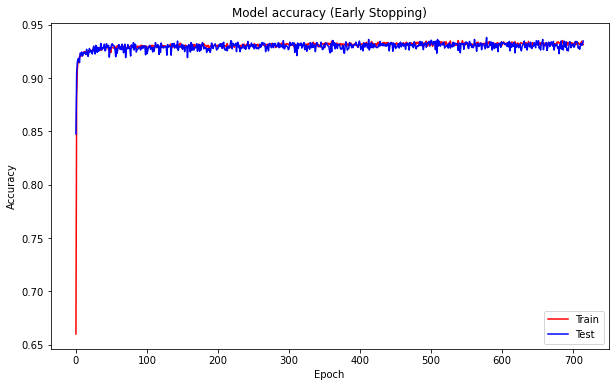

In [64]:
plot(history.history, 'Epoch', 'Accuracy', 'Model accuracy (Early Stopping)', 'accuracy', 'val_accuracy', 'lower right', 'es-epoch-accuracy')

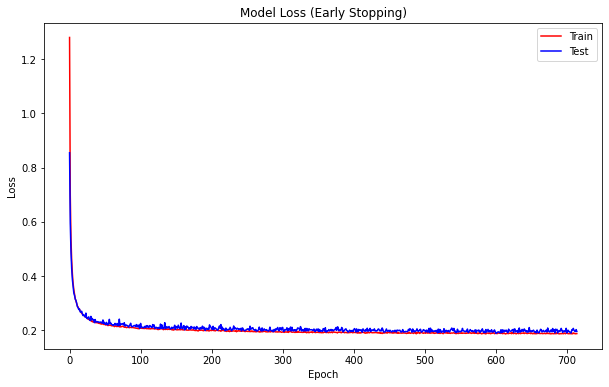

In [65]:
plot(history.history, 'Epoch', 'Loss', 'Model Loss (Early Stopping)', 'loss', 'val_loss', 'upper right', 'es-epoch-loss')

# Model Evaluation

In [66]:
accuracy = model.evaluate(X_train, y_train, verbose=0, return_dict=True)
accuracy

{'loss': 0.1853208988904953, 'accuracy': 0.9337271451950073}

# Model Prediction

In [67]:
y_pred = model.predict(X_test)
# Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
# Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [68]:
acc_score = accuracy_score(pred,test)
print('Accuracy is: ', acc_score*100)

Accuracy is:  93.46622369878183


# References
1. https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
2. https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
3. https://towardsdatascience.com/hyper-parameters-in-action-part-ii-weight-initializers-35aee1a28404
4. https://ruder.io/optimizing-gradient-descent/index.html#nadam
5. https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
6. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
7. https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
8. https://github.com/sanchit2843/dlworkshop/blob/master/Lesson%204%20-%20Neuralnetworkkeras.ipynb
9. https://towardsdatascience.com/are-you-using-the-scikit-learn-wrapper-in-your-keras-deep-learning-model-a3005696ff38
10. https://medium.com/@411.codebrain/train-test-split-vs-stratifiedshufflesplit-374c3dbdcc36